Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, precision_recall_curve, accuracy_score,
                             precision_score, recall_score, f1_score)

# XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

# Feature importance
from sklearn.inspection import permutation_importance

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("All libraries imported successfully!")

All libraries imported successfully!


Load the Dataset

In [2]:
# Load your preprocessed data
file_path = r'C:\Users\Senu\Downloads\ATOMIC-DementiaPredictionModel\training_dataset.csv'
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum().sum()} total missing values")

# Check data types
print(f"\nData types:\n{df.dtypes.value_counts()}")

Dataset loaded successfully!
Shape: (195195, 64)

First few rows:
   ALCOCCAS  ANXIETY  APNEA  ARTHRIT  BILLS  BIRTHMO  BIRTHYR  DEMENTED  \
0         2        2      1        1      1        5     1952         1   
1         2        1      1        1      2        5     1952         1   
2         2        1      1        1      1       12     1956         1   
3         1        1      1        1      4        1     1958         2   
4         2        1      1        1      1        2     1945         1   

   DEP2YRS  EDUC  EVENTS  GAMES  HATTMULT  HISPOR  INBIRMO  INBIRYR  INCALLS  \
0        1    16       2      1         3       8        5     1962        7   
1        1    16       2      1         3       8        5     1962        7   
2        1    16       1      1         3       8        3     1958        7   
3        1    16       4      4         3       1        9     1947        7   
4        1    12       1      1         3       1        2     1950        1   

  

Separate Features and Target

In [3]:
df.shape

(195195, 64)

!!!!!!!!!!!!!!!!!!!!!!!!!! steps should go to preprocessing 

In [4]:
df.columns

Index(['ALCOCCAS', 'ANXIETY', 'APNEA', 'ARTHRIT', 'BILLS', 'BIRTHMO',
       'BIRTHYR', 'DEMENTED', 'DEP2YRS', 'EDUC', 'EVENTS', 'GAMES', 'HATTMULT',
       'HISPOR', 'INBIRMO', 'INBIRYR', 'INCALLS', 'INCONTF', 'INCONTU',
       'INDEPEND', 'INHISPOR', 'INRATER', 'INRELTO', 'INVISITS', 'MARISTAT',
       'MEALPREP', 'NACCACTV', 'NACCADC', 'NACCAVST', 'NACCDAYS', 'NACCFDYS',
       'NACCLIVS', 'NACCNOVS', 'NACCNRDY', 'NACCNRMO', 'NACCNRYR', 'NACCNVST',
       'NACCREAS', 'NACCREFR', 'NACCVNUM', 'NEWINF', 'NPFORMVER', 'NPSEX',
       'PACKET', 'PAYATTN', 'PRIMLANG', 'PTSDDX', 'PTSDDXIF', 'RBD',
       'REMDATES', 'RESIDENC', 'SCHIZOIF', 'SCHIZOP', 'SEX', 'SHOPPING',
       'SMOKYRS', 'STOVE', 'STROKMUL', 'TAXES', 'TIAMULT', 'TRAVEL',
       'VISITDAY', 'VISITMO', 'VISITYR'],
      dtype='object')

In [5]:
# KEEP ONLY INITIAL VISIT
df = df[df['NACCVNUM'] == 1].copy()

In [6]:
leakage_cols = [
    'NACCVNUM', 'VISITMO', 'VISITDAY', 'VISITYR',
    'NACCACTV', 'NACCLIVS', 'NACCREAS', 'NACCREFR',
    'NPFORMVER', 'NPSEX', 'REMDATES', 'NEWINF',
    'INVISITS', 'INCALLS', 'INRATER'
]

df = df.drop(columns=[c for c in leakage_cols if c in df.columns], errors='ignore')

In [7]:
df.columns

Index(['ALCOCCAS', 'ANXIETY', 'APNEA', 'ARTHRIT', 'BILLS', 'BIRTHMO',
       'BIRTHYR', 'DEMENTED', 'DEP2YRS', 'EDUC', 'EVENTS', 'GAMES', 'HATTMULT',
       'HISPOR', 'INBIRMO', 'INBIRYR', 'INCONTF', 'INCONTU', 'INDEPEND',
       'INHISPOR', 'INRELTO', 'MARISTAT', 'MEALPREP', 'NACCADC', 'NACCAVST',
       'NACCDAYS', 'NACCFDYS', 'NACCNOVS', 'NACCNRDY', 'NACCNRMO', 'NACCNRYR',
       'NACCNVST', 'PACKET', 'PAYATTN', 'PRIMLANG', 'PTSDDX', 'PTSDDXIF',
       'RBD', 'RESIDENC', 'SCHIZOIF', 'SCHIZOP', 'SEX', 'SHOPPING', 'SMOKYRS',
       'STOVE', 'STROKMUL', 'TAXES', 'TIAMULT', 'TRAVEL'],
      dtype='object')

In [8]:
df.shape

(57663, 49)

Target column 'DEMENTED' found!

Features shape: (57663, 48)
Target shape: (57663,)

Class Distribution:
DEMENTED
1    39567
2    18096
Name: count, dtype: int64

Class Distribution (%):
DEMENTED
1    68.617658
2    31.382342
Name: proportion, dtype: float64


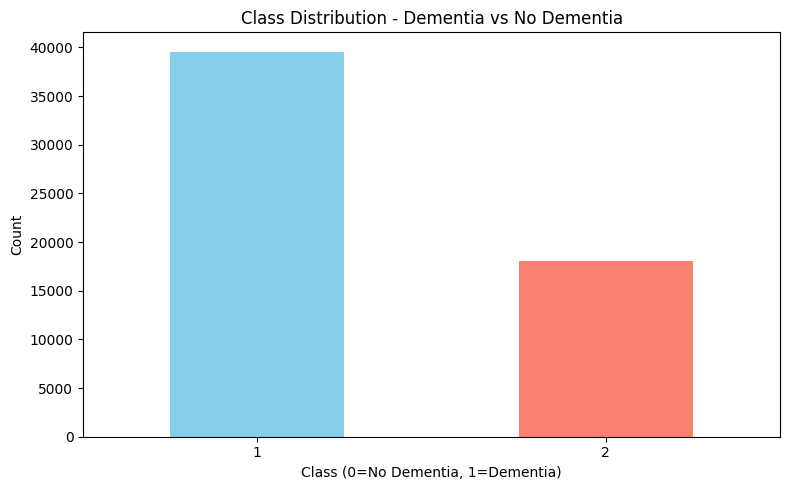

In [9]:
# Define target variable
target = 'DEMENTED'

# Check if target exists
if target not in df.columns:
    print(f"ERROR: Target column '{target}' not found!")
    print(f"Available columns: {df.columns.tolist()}")
else:
    print(f"Target column '{target}' found!")

# Separate features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Check class distribution
print(f"\nClass Distribution:")
print(y.value_counts())
print(f"\nClass Distribution (%):")
print(y.value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution - Dementia vs No Dementia')
plt.xlabel('Class (0=No Dementia, 1=Dementia)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Split Data into Train and Test Sets

In [10]:
# Check current values in DEMENTED
print("Current DEMENTED values:")
print(df['DEMENTED'].value_counts().sort_index())

# Remap DEMENTED: 1 -> 0 (No Dementia), 2 -> 1 (Dementia)
# OR if 1 means Dementia and 2 means No Dementia, adjust accordingly
df['DEMENTED'] = df['DEMENTED'].map({1: 0, 2: 1})

# Verify the mapping
print("\nAfter remapping:")
print(df['DEMENTED'].value_counts().sort_index())

# Now separate features and target
X = df.drop(columns=['DEMENTED'])
y = df['DEMENTED']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Check class distribution
print(f"\nTrain set class distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())

# Calculate class imbalance ratio
imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}")

Current DEMENTED values:
DEMENTED
1    39567
2    18096
Name: count, dtype: int64

After remapping:
DEMENTED
0    39567
1    18096
Name: count, dtype: int64

Training set size: (46130, 48)
Test set size: (11533, 48)

Train set class distribution:
DEMENTED
0    31653
1    14477
Name: count, dtype: int64

Test set class distribution:
DEMENTED
0    7914
1    3619
Name: count, dtype: int64

Class imbalance ratio: 2.19


Feature Scaling

In [ ]:
# Uncomment if you want to scale features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("Feature scaling completed!")

print("Skipping feature scaling (XGBoost works well without it)")

Feature scaling completed!
Skipping feature scaling (XGBoost works well without it)


Build Baseline XGBoost Model

In [ ]:
print("="*60)
print("BUILDING BASELINE XGBOOST MODEL")
print("="*60)

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Create baseline XGBoost model
baseline_xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight, 
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1
)

# Train baseline model
print("\nTraining baseline model...")
baseline_xgb.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred_baseline = baseline_xgb.predict(X_test)
y_pred_proba_baseline = baseline_xgb.predict_proba(X_test)[:, 1]

# Evaluate baseline model
print("\n" + "="*60)
print("BASELINE MODEL PERFORMANCE")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_baseline):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_baseline):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_baseline):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_baseline):.4f}")

BUILDING BASELINE XGBOOST MODEL

Training baseline model...
Training completed!

BASELINE MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      7914
           1       0.80      0.91      0.85      3619

    accuracy                           0.90     11533
   macro avg       0.88      0.90      0.89     11533
weighted avg       0.91      0.90      0.90     11533


Accuracy: 0.9016
Precision: 0.8035
Recall: 0.9085
F1-Score: 0.8528
ROC-AUC: 0.9680


Confusion Matrix Visualization - XGBoost

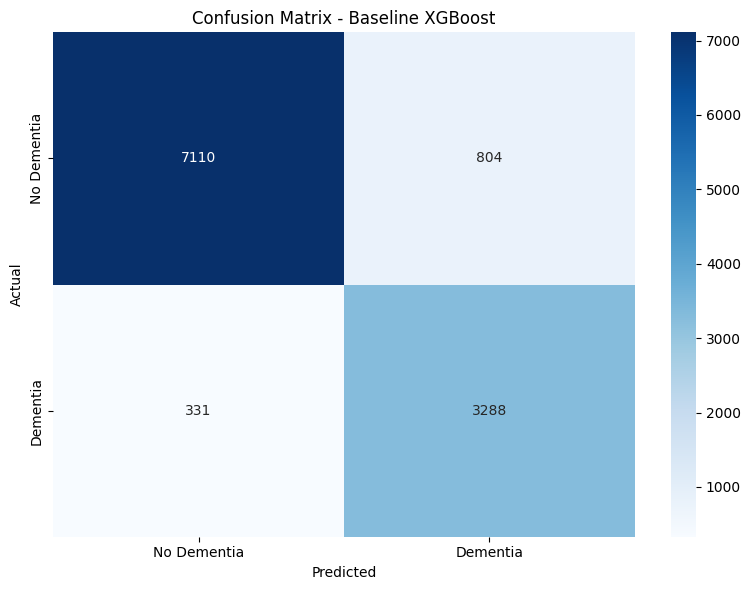


True Negatives: 7110
False Positives: 804
False Negatives: 331
True Positives: 3288

Specificity: 0.8984
Sensitivity (Recall): 0.9085


In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Dementia', 'Dementia'],
            yticklabels=['No Dementia', 'Dementia'])
plt.title('Confusion Matrix - Baseline XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Calculate metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Specificity and Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSpecificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")

ROC Curve -XGBoost

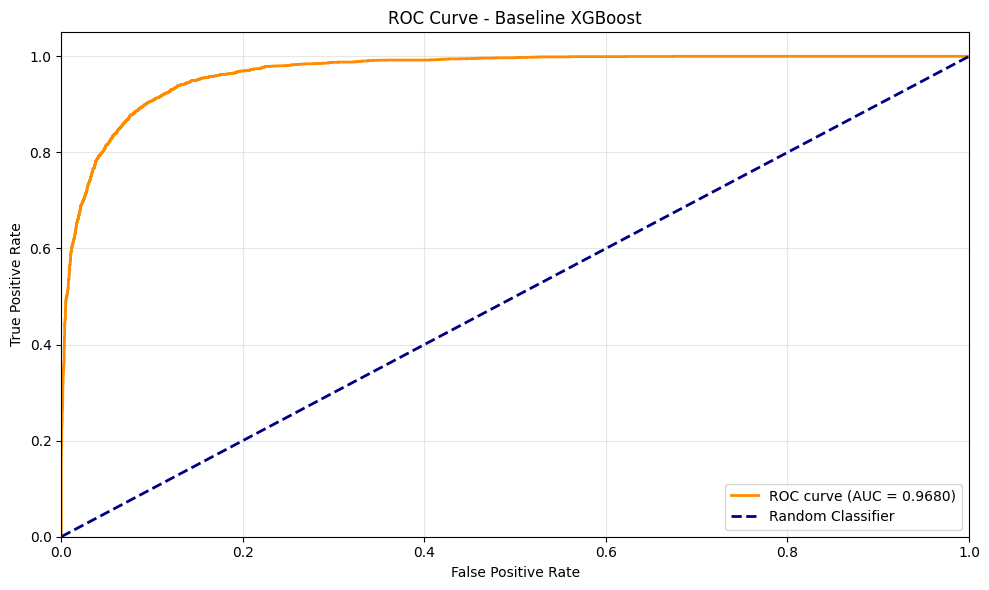

In [31]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_baseline)
roc_auc = roc_auc_score(y_test, y_pred_proba_baseline)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline XGBoost')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Precision-Recall Curve - XGBoost

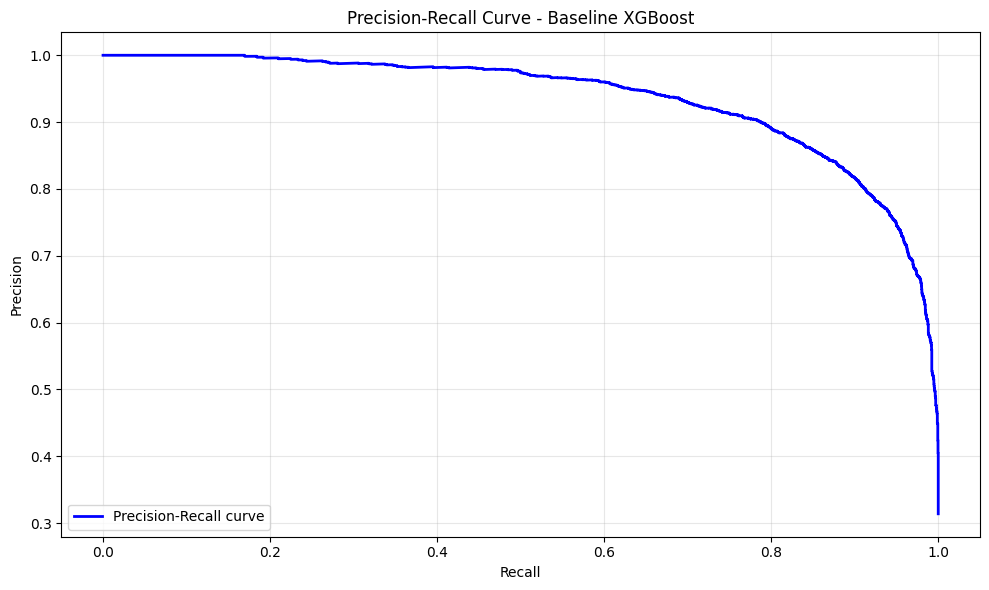

In [32]:
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_baseline)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Baseline XGBoost')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Hyperparameter Tuning with GridSearchCV -XGBoost

In [ ]:
print("="*60)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("="*60)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# For faster execution
param_grid_small = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1]
}


param_grid_to_use = param_grid_small 

# Create base model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    tree_method='hist'
)

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
print("\nStarting GridSearchCV...")
print(f"Total combinations to test: {np.prod([len(v) for v in param_grid_to_use.values()])}")
print("This may take several minutes...\n")

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_to_use,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print("\nGridSearchCV completed!")
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation ROC-AUC score: {grid_search.best_score_:.4f}")

HYPERPARAMETER TUNING WITH GRIDSEARCHCV

Starting GridSearchCV...
Total combinations to test: 64
This may take several minutes...

Fitting 5 folds for each of 64 candidates, totalling 320 fits

GridSearchCV completed!

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation ROC-AUC score: 0.9695


Evaluate Tuned Model - XGBoost

In [35]:
print("="*60)
print("TUNED MODEL PERFORMANCE")
print("="*60)

# Get best model
best_xgb = grid_search.best_estimator_

# Make predictions with tuned model
y_pred_tuned = best_xgb.predict(X_test)
y_pred_proba_tuned = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate tuned model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")

# Compare with baseline
print("\n" + "="*60)
print("BASELINE vs TUNED MODEL COMPARISON")
print("="*60)
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Baseline': [
        accuracy_score(y_test, y_pred_baseline),
        precision_score(y_test, y_pred_baseline),
        recall_score(y_test, y_pred_baseline),
        f1_score(y_test, y_pred_baseline),
        roc_auc_score(y_test, y_pred_proba_baseline)
    ],
    'Tuned': [
        accuracy_score(y_test, y_pred_tuned),
        precision_score(y_test, y_pred_tuned),
        recall_score(y_test, y_pred_tuned),
        f1_score(y_test, y_pred_tuned),
        roc_auc_score(y_test, y_pred_proba_tuned)
    ]
})
comparison['Improvement'] = comparison['Tuned'] - comparison['Baseline']
print(comparison.to_string(index=False))

TUNED MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7914
           1       0.81      0.90      0.86      3619

    accuracy                           0.90     11533
   macro avg       0.88      0.90      0.89     11533
weighted avg       0.91      0.90      0.91     11533


Accuracy: 0.9045
Precision: 0.8135
Recall: 0.9027
F1-Score: 0.8558
ROC-AUC: 0.9687

BASELINE vs TUNED MODEL COMPARISON
   Metric  Baseline    Tuned  Improvement
 Accuracy  0.901587 0.904535     0.002948
Precision  0.803519 0.813496     0.009977
   Recall  0.908538 0.902736    -0.005803
 F1-Score  0.852808 0.855796     0.002988
  ROC-AUC  0.967952 0.968687     0.000735


Feature Importance Analysis -XGBoost

FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features:
     Feature  Importance
17  INDEPEND    0.366156
4      BILLS    0.208240
47    TRAVEL    0.074422
45     TAXES    0.052053
9     EVENTS    0.023397
41  SHOPPING    0.021117
32   PAYATTN    0.013997
38  SCHIZOIF    0.012973
35  PTSDDXIF    0.012633
26  NACCNOVS    0.011903
10     GAMES    0.011764
21  MEALPREP    0.011514
3    ARTHRIT    0.009288
22   NACCADC    0.008783
19   INRELTO    0.007439
0   ALCOCCAS    0.007020
30  NACCNVST    0.006916
7    DEP2YRS    0.006841
37  RESIDENC    0.006812
12    HISPOR    0.005892


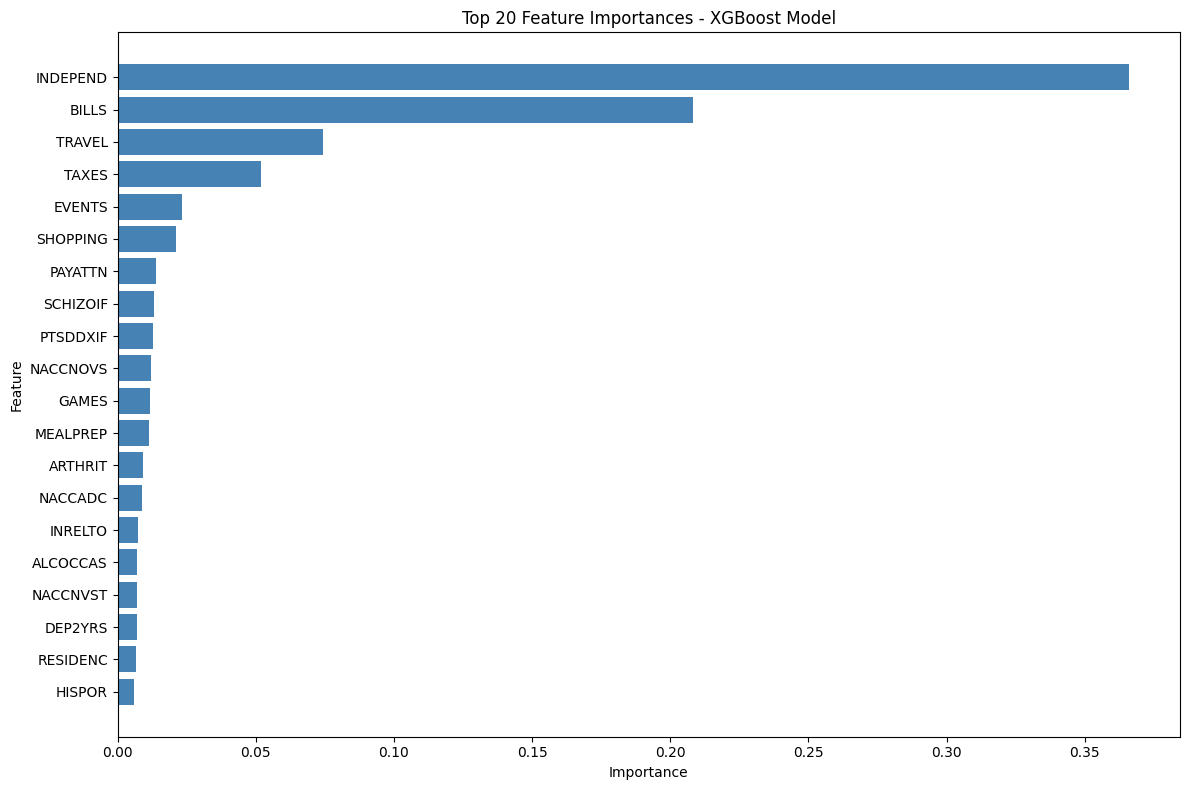


Feature importance saved to 'feature_importance_xgboost.csv'


In [36]:
print("="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importance from the model
feature_importance = best_xgb.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance_df.head(20))

# Visualize top 20 features
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(20)
plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances - XGBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save feature importance to CSV
feature_importance_df.to_csv('feature_importance_xgboost.csv', index=False)
print("\nFeature importance saved to 'feature_importance_xgboost.csv'")

Cross-Validation Score - XGBoost

CROSS-VALIDATION PERFORMANCE

Cross-Validation ROC-AUC Scores: [0.96887309 0.96624565 0.97029716 0.96826461 0.97068257]
Mean CV ROC-AUC: 0.9689
Std CV ROC-AUC: 0.0016


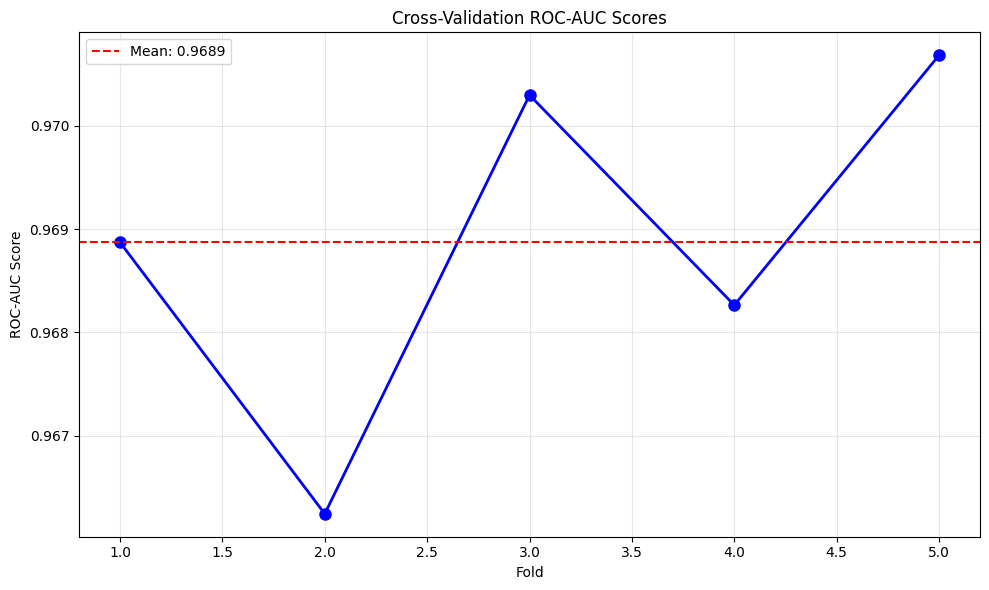

In [37]:
print("="*60)
print("CROSS-VALIDATION PERFORMANCE")
print("="*60)

# Perform cross-validation on the best model
cv_scores = cross_val_score(
    best_xgb, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)

print(f"\nCross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean CV ROC-AUC: {cv_scores.mean():.4f}")
print(f"Std CV ROC-AUC: {cv_scores.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('ROC-AUC Score')
plt.title('Cross-Validation ROC-AUC Scores')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Save the Trained XGBoost Model

In [38]:
import pickle

print("="*60)
print("SAVING THE MODEL")
print("="*60)

# Save the best model
model_filename = 'xgboost_dementia_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb, file)

print(f"\nModel saved as '{model_filename}'")

# Save model parameters
params_filename = 'xgboost_best_params.txt'
with open(params_filename, 'w') as f:
    f.write("Best XGBoost Parameters:\n")
    f.write("="*50 + "\n")
    for param, value in grid_search.best_params_.items():
        f.write(f"{param}: {value}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Best CV ROC-AUC Score: {grid_search.best_score_:.4f}\n")

print(f"Best parameters saved to '{params_filename}'")

# Test loading the model
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Verify loaded model works
test_prediction = loaded_model.predict(X_test[:5])
print(f"\nModel loaded successfully! Test prediction: {test_prediction}")

SAVING THE MODEL

Model saved as 'xgboost_dementia_model.pkl'
Best parameters saved to 'xgboost_best_params.txt'

Model loaded successfully! Test prediction: [1 0 0 1 0]


Generate XGBoost Final Report Summary

In [39]:
print("\n" + "="*60)
print("FINAL MODEL SUMMARY")
print("="*60)

final_report = f"""
XGBoost Dementia Prediction Model - Final Report
{'='*60}

Dataset Information:
- Total samples: {df.shape[0]}
- Total features: {X.shape[1]}
- Training samples: {X_train.shape[0]}
- Test samples: {X_test.shape[0]}
- Class imbalance ratio: {imbalance_ratio:.2f}

Best Hyperparameters:
{grid_search.best_params_}

Model Performance on Test Set:
- Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}
- Precision: {precision_score(y_test, y_pred_tuned):.4f}
- Recall: {recall_score(y_test, y_pred_tuned):.4f}
- F1-Score: {f1_score(y_test, y_pred_tuned):.4f}
- ROC-AUC: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}

Cross-Validation Performance:
- Mean CV ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})

Top 5 Most Important Features:
{feature_importance_df.head(5).to_string(index=False)}

Model saved as: {model_filename}
"""

print(final_report)

# Save report to file
with open('xgboost_model_report.txt', 'w') as f:
    f.write(final_report)

print("\nReport saved to 'xgboost_model_report.txt'")
print("\n" + "="*60)
print("MODEL TRAINING COMPLETE!")
print("="*60)


FINAL MODEL SUMMARY

XGBoost Dementia Prediction Model - Final Report

Dataset Information:
- Total samples: 57663
- Total features: 48
- Training samples: 46130
- Test samples: 11533
- Class imbalance ratio: 2.19

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Model Performance on Test Set:
- Accuracy: 0.9045
- Precision: 0.8135
- Recall: 0.9027
- F1-Score: 0.8558
- ROC-AUC: 0.9687

Cross-Validation Performance:
- Mean CV ROC-AUC: 0.9689 (+/- 0.0016)

Top 5 Most Important Features:
 Feature  Importance
INDEPEND    0.366156
   BILLS    0.208240
  TRAVEL    0.074422
   TAXES    0.052053
  EVENTS    0.023397

Model saved as: xgboost_dementia_model.pkl


Report saved to 'xgboost_model_report.txt'

MODEL TRAINING COMPLETE!


Build Baseline Random Forest Model

In [40]:
print("="*80)
print("RANDOM FOREST MODEL TRAINING")
print("="*80)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, accuracy_score, precision_score, 
                             recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Build baseline Random Forest
print("\n" + "="*60)
print("BUILDING BASELINE RANDOM FOREST MODEL")
print("="*60)

baseline_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Handle class imbalance
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Train baseline model
print("\nTraining baseline Random Forest...")
baseline_rf.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred_rf_baseline = baseline_rf.predict(X_test)
y_pred_proba_rf_baseline = baseline_rf.predict_proba(X_test)[:, 1]

# Evaluate baseline model
print("\n" + "="*60)
print("BASELINE RANDOM FOREST PERFORMANCE")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_baseline, 
                          target_names=['No Dementia', 'Dementia']))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf_baseline):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_baseline):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_baseline):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_baseline):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf_baseline):.4f}")

RANDOM FOREST MODEL TRAINING

BUILDING BASELINE RANDOM FOREST MODEL

Training baseline Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s


Training completed!

BASELINE RANDOM FOREST PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

 No Dementia       0.95      0.90      0.92      7914
    Dementia       0.80      0.89      0.84      3619

    accuracy                           0.90     11533
   macro avg       0.87      0.89      0.88     11533
weighted avg       0.90      0.90      0.90     11533


Accuracy: 0.8955
Precision: 0.8008
Recall: 0.8878
F1-Score: 0.8421
ROC-AUC: 0.9618


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Confusion Matrix Visualization -Random Forest Model

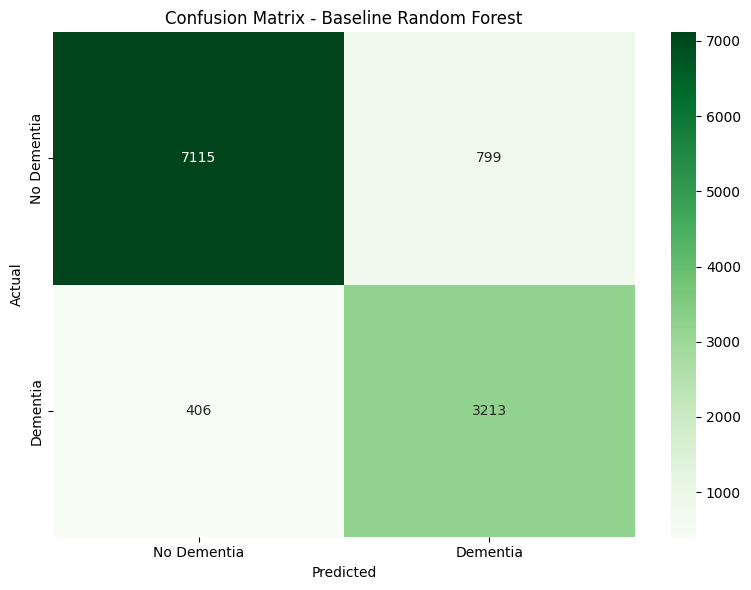


True Negatives: 7115
False Positives: 799
False Negatives: 406
True Positives: 3213

Specificity: 0.8990
Sensitivity (Recall): 0.8878


In [41]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_baseline)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Dementia', 'Dementia'],
            yticklabels=['No Dementia', 'Dementia'])
plt.title('Confusion Matrix - Baseline Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Calculate metrics from confusion matrix
tn, fp, fn, tp = cm_rf.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Specificity and Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSpecificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")

ROC Curve - Random Forest Model

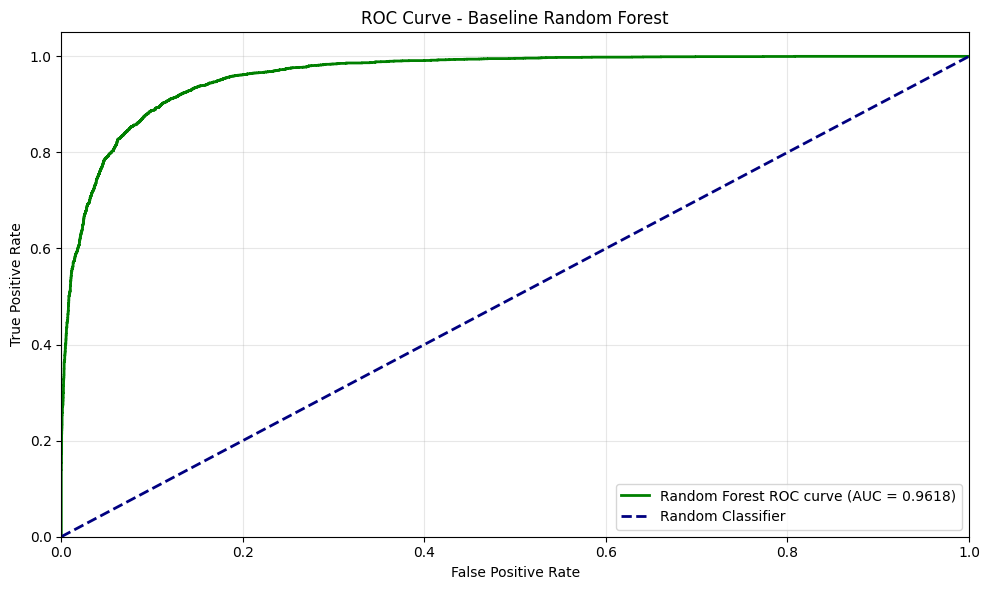

In [42]:
# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf_baseline)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf_baseline)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, 
         label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Random Forest')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Precision-Recall Curve - Random Forest Model

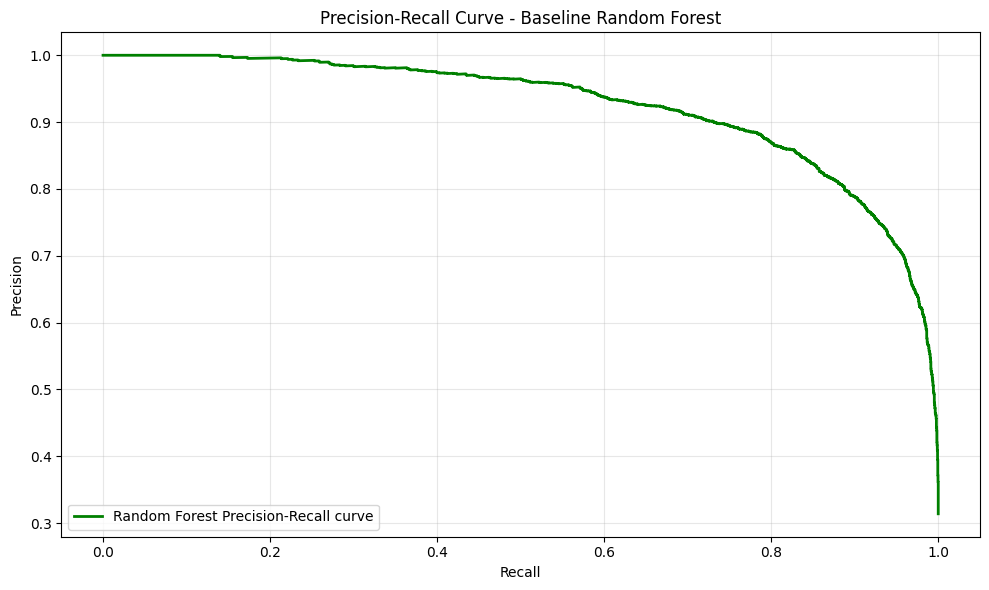

In [43]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(
    y_test, y_pred_proba_rf_baseline
)

plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, color='green', lw=2, 
         label='Random Forest Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Baseline Random Forest')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

print("\n" + "="*60)
print("HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV")
print("="*60)

# Define parameter distributions for RandomizedSearch
param_distributions = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_samples': [0.7, 0.8, 0.9, None]
}


param_distributions_small = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy']
}


param_to_use = param_distributions_small  


# Create base model
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1,
    verbose=0
)

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
print("\nStarting RandomizedSearchCV...")
print(f"Testing {100} random combinations from parameter space")
print("This may take several minutes...\n")

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_to_use,
    n_iter=100,  # Number of random combinations to try
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42,
    return_train_score=True
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

print("\nRandomizedSearchCV completed!")
print(f"\nBest parameters: {random_search_rf.best_params_}")
print(f"Best cross-validation ROC-AUC score: {random_search_rf.best_score_:.4f}")


HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV

Starting RandomizedSearchCV...
Testing 100 random combinations from parameter space
This may take several minutes...

Fitting 5 folds for each of 100 candidates, totalling 500 fits

RandomizedSearchCV completed!

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}
Best cross-validation ROC-AUC score: 0.9647


Evaluate Tuned Random Forest Model

In [46]:
print("\n" + "="*60)
print("TUNED RANDOM FOREST PERFORMANCE")
print("="*60)

# Get best model
best_rf = random_search_rf.best_estimator_

# Make predictions with tuned model
y_pred_rf_tuned = best_rf.predict(X_test)
y_pred_proba_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

# Evaluate tuned model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned, 
                          target_names=['No Dementia', 'Dementia']))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf_tuned):.4f}")

# Compare baseline vs tuned
print("\n" + "="*60)
print("BASELINE vs TUNED RANDOM FOREST COMPARISON")
print("="*60)

import pandas as pd
comparison_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Baseline': [
        accuracy_score(y_test, y_pred_rf_baseline),
        precision_score(y_test, y_pred_rf_baseline),
        recall_score(y_test, y_pred_rf_baseline),
        f1_score(y_test, y_pred_rf_baseline),
        roc_auc_score(y_test, y_pred_proba_rf_baseline)
    ],
    'Tuned': [
        accuracy_score(y_test, y_pred_rf_tuned),
        precision_score(y_test, y_pred_rf_tuned),
        recall_score(y_test, y_pred_rf_tuned),
        f1_score(y_test, y_pred_rf_tuned),
        roc_auc_score(y_test, y_pred_proba_rf_tuned)
    ]
})
comparison_rf['Improvement'] = comparison_rf['Tuned'] - comparison_rf['Baseline']
print(comparison_rf.to_string(index=False))


TUNED RANDOM FOREST PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

 No Dementia       0.93      0.93      0.93      7914
    Dementia       0.84      0.85      0.85      3619

    accuracy                           0.90     11533
   macro avg       0.89      0.89      0.89     11533
weighted avg       0.90      0.90      0.90     11533


Accuracy: 0.9039
Precision: 0.8418
Recall: 0.8544
F1-Score: 0.8481
ROC-AUC: 0.9635

BASELINE vs TUNED RANDOM FOREST COMPARISON
   Metric  Baseline    Tuned  Improvement
 Accuracy  0.895517 0.903928     0.008411
Precision  0.800847 0.841819     0.040971
   Recall  0.887814 0.854380    -0.033435
 F1-Score  0.842091 0.848053     0.005961
  ROC-AUC  0.961765 0.963518     0.001753


Feature Importance Analysis - Random Forest Model


FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features:
     Feature  Importance
17  INDEPEND    0.137336
4      BILLS    0.104596
47    TRAVEL    0.097177
45     TAXES    0.074401
41  SHOPPING    0.070982
9     EVENTS    0.062860
21  MEALPREP    0.060677
10     GAMES    0.040865
32   PAYATTN    0.036278
22   NACCADC    0.025622
6    BIRTHYR    0.025422
24  NACCDAYS    0.025413
14   INBIRYR    0.022948
43     STOVE    0.022071
13   INBIRMO    0.017069
8       EDUC    0.016536
5    BIRTHMO    0.016512
30  NACCNVST    0.016324
23  NACCAVST    0.014229
26  NACCNOVS    0.013687


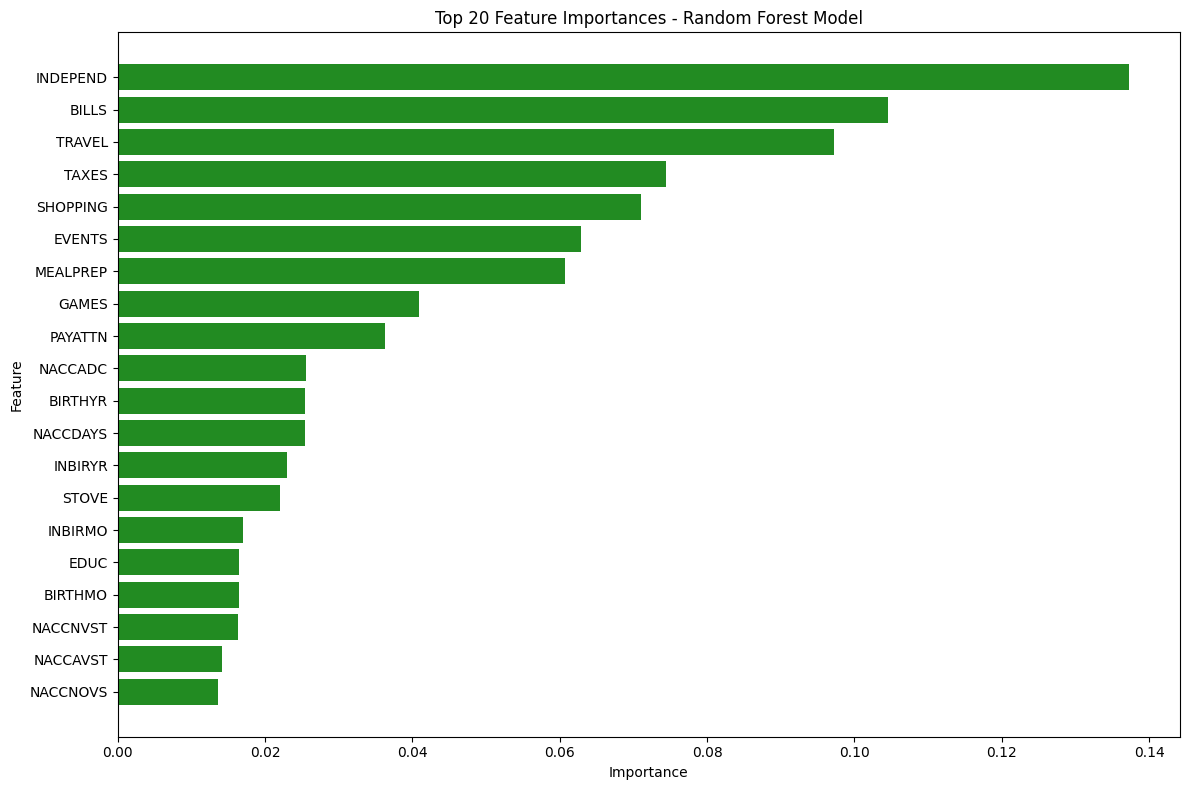


Feature importance saved to 'feature_importance_random_forest.csv'


In [47]:
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importance from the tuned model
feature_importance_rf = best_rf.feature_importances_

# Create a DataFrame
feature_importance_rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_rf
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance_rf_df.head(20))

# Visualize top 20 features
plt.figure(figsize=(12, 8))
top_features_rf = feature_importance_rf_df.head(20)
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'], 
         color='forestgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances - Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save feature importance to CSV
feature_importance_rf_df.to_csv('feature_importance_random_forest.csv', index=False)
print("\nFeature importance saved to 'feature_importance_random_forest.csv'")

Cross-Validation Performance -Random Forest Model


CROSS-VALIDATION PERFORMANCE

Cross-Validation ROC-AUC Scores: [0.96445855 0.96194053 0.96549555 0.96429274 0.96637676]
Mean CV ROC-AUC: 0.9645
Std CV ROC-AUC: 0.0015


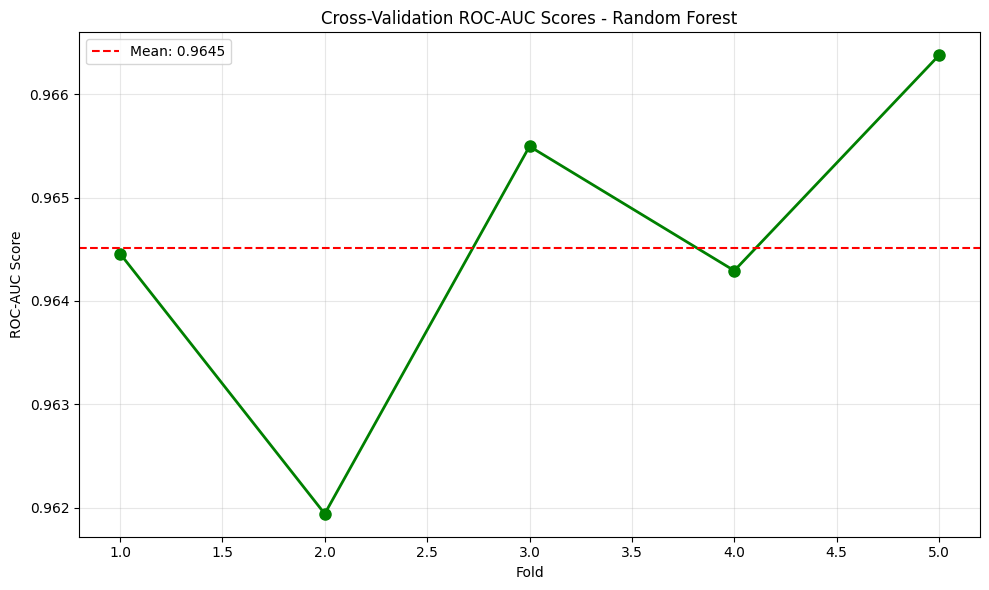

In [48]:
from sklearn.model_selection import cross_val_score

print("\n" + "="*60)
print("CROSS-VALIDATION PERFORMANCE")
print("="*60)

# Perform cross-validation on the best model
cv_scores_rf = cross_val_score(
    best_rf, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)

print(f"\nCross-Validation ROC-AUC Scores: {cv_scores_rf}")
print(f"Mean CV ROC-AUC: {cv_scores_rf.mean():.4f}")
print(f"Std CV ROC-AUC: {cv_scores_rf.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_rf, marker='o', linestyle='-', 
         color='green', linewidth=2, markersize=8)
plt.axhline(y=cv_scores_rf.mean(), color='red', linestyle='--', 
            label=f'Mean: {cv_scores_rf.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('ROC-AUC Score')
plt.title('Cross-Validation ROC-AUC Scores - Random Forest')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Out-of-Bag (OOB) Score - Random Forest Model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier


if best_rf.bootstrap:
    print("\n" + "="*60)
    print("OUT-OF-BAG (OOB) SCORE")
    print("="*60)


    params = best_rf.get_params()
    # Remove keys that we will set explicitly
    for key in ['oob_score', 'random_state']:
        params.pop(key, None)


    rf_oob = RandomForestClassifier(
        **params,               # all tuned hyper-params
        oob_score=True,        # force OOB calculation
        random_state=42        # keep the same seed (optional)
    )


    rf_oob.fit(X_train, y_train)
    print(f"\nOOB Score: {rf_oob.oob_score_:.4f}")
    print("(OOB score ≈ test-set performance when bootstrap=True)")

else:
    print("\nOOB score not available – bootstrap=False")


OUT-OF-BAG (OOB) SCORE

OOB Score: 0.9047
(OOB score ≈ test-set performance when bootstrap=True)


Learning Curves - Random Forest Model


GENERATING LEARNING CURVES


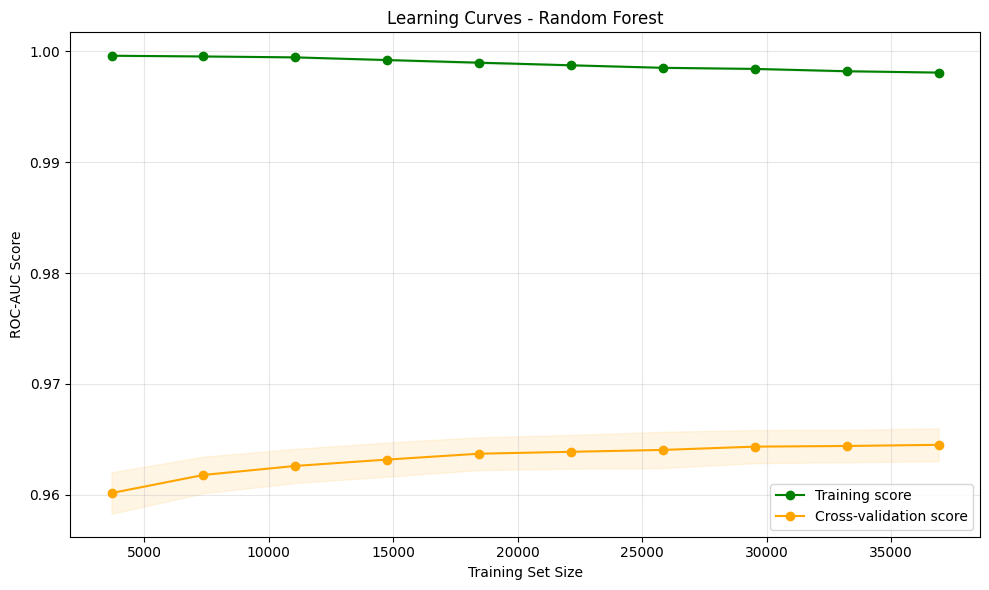

In [51]:
from sklearn.model_selection import learning_curve

print("\n" + "="*60)
print("GENERATING LEARNING CURVES")
print("="*60)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_rf,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='green')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_scores_mean, 'o-', color='green', 
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', 
         label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.title('Learning Curves - Random Forest')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Save the Random Forest Model

In [52]:
import pickle

print("\n" + "="*60)
print("SAVING THE RANDOM FOREST MODEL")
print("="*60)

# Save the best model
model_filename_rf = 'random_forest_dementia_model.pkl'
with open(model_filename_rf, 'wb') as file:
    pickle.dump(best_rf, file)

print(f"\nModel saved as '{model_filename_rf}'")

# Save model parameters
params_filename_rf = 'random_forest_best_params.txt'
with open(params_filename_rf, 'w') as f:
    f.write("Best Random Forest Parameters:\n")
    f.write("="*50 + "\n")
    for param, value in random_search_rf.best_params_.items():
        f.write(f"{param}: {value}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Best CV ROC-AUC Score: {random_search_rf.best_score_:.4f}\n")

print(f"Best parameters saved to '{params_filename_rf}'")

# Test loading the model
with open(model_filename_rf, 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Verify loaded model works
test_prediction_rf = loaded_rf_model.predict(X_test[:5])
print(f"\nModel loaded successfully! Test prediction: {test_prediction_rf}")


SAVING THE RANDOM FOREST MODEL

Model saved as 'random_forest_dementia_model.pkl'
Best parameters saved to 'random_forest_best_params.txt'

Model loaded successfully! Test prediction: [0 0 0 1 0]


Generate Final Random Forest Report

In [53]:
print("\n" + "="*60)
print("RANDOM FOREST MODEL - FINAL REPORT")
print("="*60)

final_report_rf = f"""
Random Forest Dementia Prediction Model - Final Report
{'='*60}

Dataset Information:
- Total samples: {df.shape[0]}
- Total features: {X.shape[1]}
- Training samples: {X_train.shape[0]}
- Test samples: {X_test.shape[0]}

Best Hyperparameters:
{random_search_rf.best_params_}

Model Performance on Test Set:
- Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}
- Precision: {precision_score(y_test, y_pred_rf_tuned):.4f}
- Recall: {recall_score(y_test, y_pred_rf_tuned):.4f}
- F1-Score: {f1_score(y_test, y_pred_rf_tuned):.4f}
- ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf_tuned):.4f}

Cross-Validation Performance:
- Mean CV ROC-AUC: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})

Top 5 Most Important Features:
{feature_importance_rf_df.head(5).to_string(index=False)}

Model saved as: {model_filename_rf}
"""

print(final_report_rf)

# Save report to file
with open('random_forest_model_report.txt', 'w') as f:
    f.write(final_report_rf)

print("\nReport saved to 'random_forest_model_report.txt'")
print("\n" + "="*60)
print("RANDOM FOREST MODEL TRAINING COMPLETE!")
print("="*60)


RANDOM FOREST MODEL - FINAL REPORT

Random Forest Dementia Prediction Model - Final Report

Dataset Information:
- Total samples: 57663
- Total features: 48
- Training samples: 46130
- Test samples: 11533

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}

Model Performance on Test Set:
- Accuracy: 0.9039
- Precision: 0.8418
- Recall: 0.8544
- F1-Score: 0.8481
- ROC-AUC: 0.9635

Cross-Validation Performance:
- Mean CV ROC-AUC: 0.9645 (+/- 0.0015)

Top 5 Most Important Features:
 Feature  Importance
INDEPEND    0.137336
   BILLS    0.104596
  TRAVEL    0.097177
   TAXES    0.074401
SHOPPING    0.070982

Model saved as: random_forest_dementia_model.pkl


Report saved to 'random_forest_model_report.txt'

RANDOM FOREST MODEL TRAINING COMPLETE!


Import LightGBM and Build Baseline Model

In [14]:
print("="*80)
print("LIGHTGBM MODEL TRAINING")
print("="*80)

import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, accuracy_score, precision_score, 
                             recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Build baseline LightGBM
print("\n" + "="*60)
print("BUILDING BASELINE LIGHTGBM MODEL")
print("="*60)

baseline_lgb = LGBMClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    num_leaves=31,
    class_weight='balanced',  # Handle class imbalance
    n_jobs=-1,
    verbose=-1,  # Suppress warnings
    force_col_wise=True
)

# Train baseline model
print("\nTraining baseline LightGBM...")
baseline_lgb.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred_lgb_baseline = baseline_lgb.predict(X_test)
y_pred_proba_lgb_baseline = baseline_lgb.predict_proba(X_test)[:, 1]

# Evaluate baseline model
print("\n" + "="*60)
print("BASELINE LIGHTGBM PERFORMANCE")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb_baseline, 
                          target_names=['No Dementia', 'Dementia']))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lgb_baseline):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb_baseline):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgb_baseline):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lgb_baseline):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lgb_baseline):.4f}")

LIGHTGBM MODEL TRAINING

BUILDING BASELINE LIGHTGBM MODEL

Training baseline LightGBM...
Training completed!

BASELINE LIGHTGBM PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

 No Dementia       0.95      0.90      0.93      7914
    Dementia       0.80      0.91      0.85      3619

    accuracy                           0.90     11533
   macro avg       0.88      0.90      0.89     11533
weighted avg       0.91      0.90      0.90     11533


Accuracy: 0.9010
Precision: 0.8032
Recall: 0.9066
F1-Score: 0.8518
ROC-AUC: 0.9678


Confusion Matrix Visualization - LightGBM 

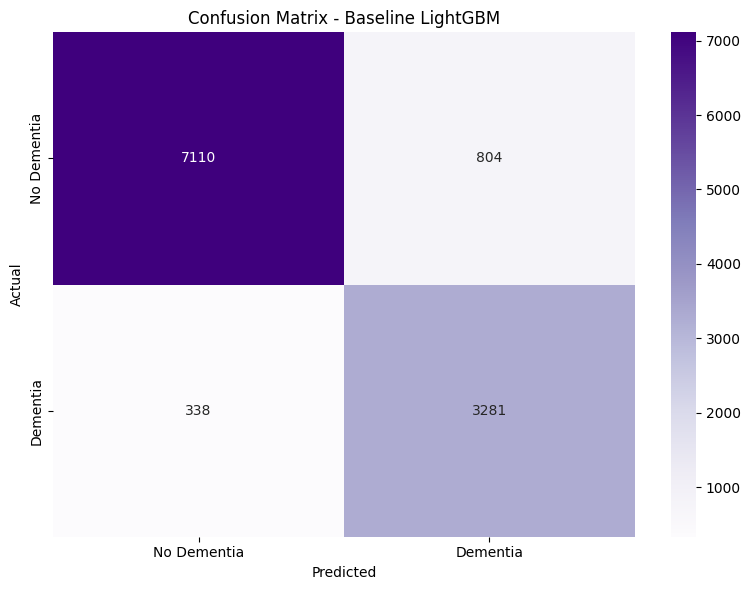


True Negatives: 7110
False Positives: 804
False Negatives: 338
True Positives: 3281

Specificity: 0.8984
Sensitivity (Recall): 0.9066


In [15]:
# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb_baseline)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['No Dementia', 'Dementia'],
            yticklabels=['No Dementia', 'Dementia'])
plt.title('Confusion Matrix - Baseline LightGBM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Calculate metrics from confusion matrix
tn, fp, fn, tp = cm_lgb.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Specificity and Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSpecificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")

ROC Curve - LightGBM 

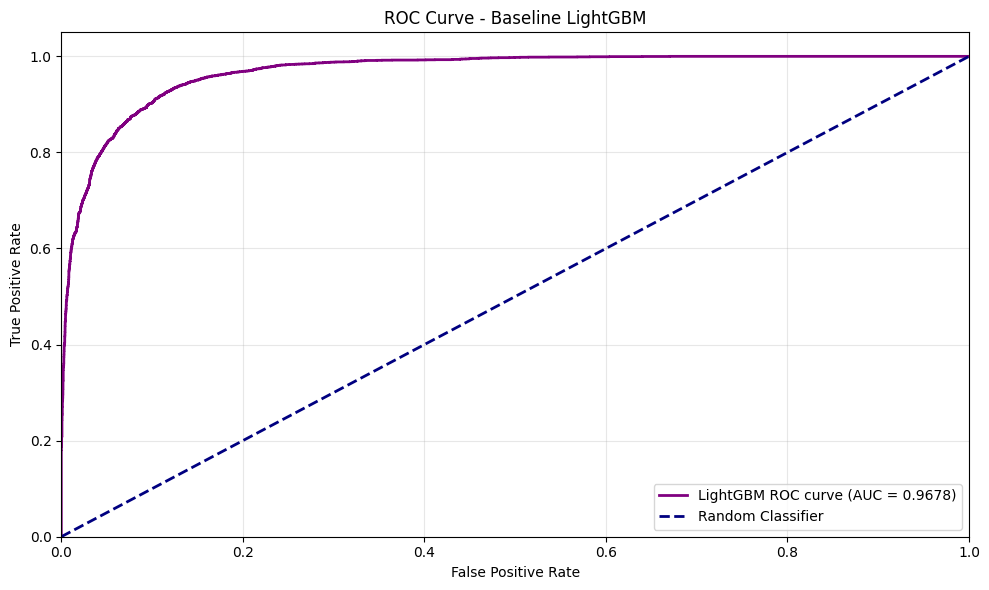

In [16]:
# ROC Curve
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_proba_lgb_baseline)
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb_baseline)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lgb, tpr_lgb, color='purple', lw=2, 
         label=f'LightGBM ROC curve (AUC = {roc_auc_lgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline LightGBM')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Precision-Recall Curve - LightGBM 

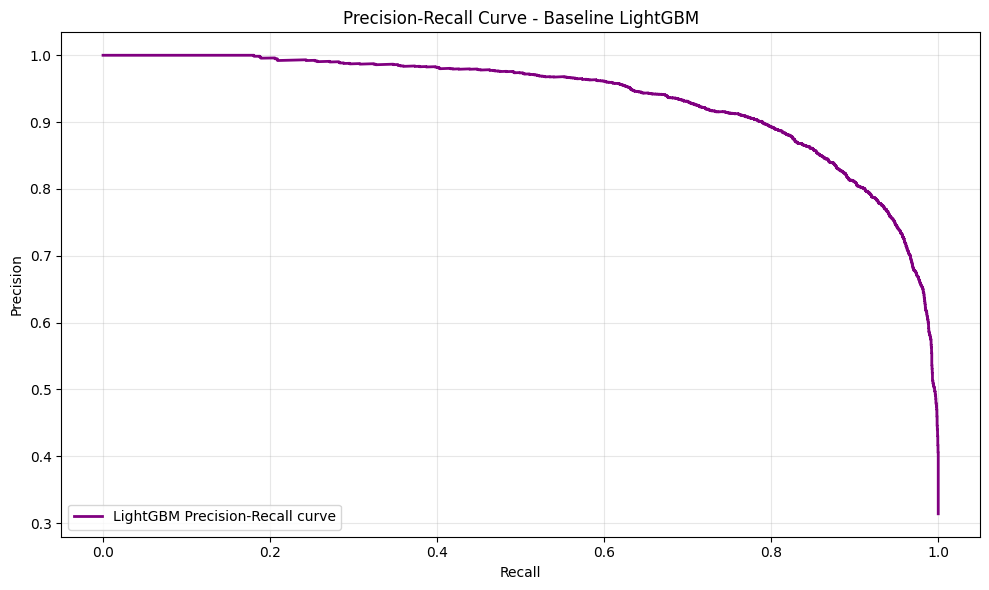

In [17]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision_lgb, recall_lgb, thresholds_pr_lgb = precision_recall_curve(
    y_test, y_pred_proba_lgb_baseline
)

plt.figure(figsize=(10, 6))
plt.plot(recall_lgb, precision_lgb, color='purple', lw=2, 
         label='LightGBM Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Baseline LightGBM')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Hyperparameter Tuning with GridSearchCV - LightGBM 

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

print("\n" + "="*60)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("="*60)

# Smaller parameter grid for faster tuning
param_grid_lgb_small = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'min_child_samples': [20, 30],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}


param_to_use_lgb = param_grid_lgb_small 


# Create base model
lgb_model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1,
    verbose=-1,
    force_col_wise=True
)

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
print("\nStarting GridSearchCV...")
total_combinations = np.prod([len(v) for v in param_to_use_lgb.values()])
print(f"Total combinations to test: {total_combinations}")
print("This may take several minutes...\n")

grid_search_lgb = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_to_use_lgb,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit GridSearchCV
grid_search_lgb.fit(X_train, y_train)

print("\nGridSearchCV completed!")
print(f"\nBest parameters: {grid_search_lgb.best_params_}")
print(f"Best cross-validation ROC-AUC score: {grid_search_lgb.best_score_:.4f}")


HYPERPARAMETER TUNING WITH GRIDSEARCHCV

Starting GridSearchCV...
Total combinations to test: 1728
This may take several minutes...

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

GridSearchCV completed!

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 300, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8}
Best cross-validation ROC-AUC score: 0.9694


Evaluate Tuned LightGBM Model 

In [20]:
print("\n" + "="*60)
print("TUNED LIGHTGBM PERFORMANCE")
print("="*60)

# Get best model
best_lgb = grid_search_lgb.best_estimator_

# Make predictions with tuned model
y_pred_lgb_tuned = best_lgb.predict(X_test)
y_pred_proba_lgb_tuned = best_lgb.predict_proba(X_test)[:, 1]

# Evaluate tuned model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb_tuned, 
                          target_names=['No Dementia', 'Dementia']))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lgb_tuned):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lgb_tuned):.4f}")

# Compare baseline vs tuned
print("\n" + "="*60)
print("BASELINE vs TUNED LIGHTGBM COMPARISON")
print("="*60)

comparison_lgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Baseline': [
        accuracy_score(y_test, y_pred_lgb_baseline),
        precision_score(y_test, y_pred_lgb_baseline),
        recall_score(y_test, y_pred_lgb_baseline),
        f1_score(y_test, y_pred_lgb_baseline),
        roc_auc_score(y_test, y_pred_proba_lgb_baseline)
    ],
    'Tuned': [
        accuracy_score(y_test, y_pred_lgb_tuned),
        precision_score(y_test, y_pred_lgb_tuned),
        recall_score(y_test, y_pred_lgb_tuned),
        f1_score(y_test, y_pred_lgb_tuned),
        roc_auc_score(y_test, y_pred_proba_lgb_tuned)
    ]
})
comparison_lgb['Improvement'] = comparison_lgb['Tuned'] - comparison_lgb['Baseline']
print(comparison_lgb.to_string(index=False))


TUNED LIGHTGBM PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

 No Dementia       0.96      0.90      0.93      7914
    Dementia       0.81      0.91      0.86      3619

    accuracy                           0.90     11533
   macro avg       0.88      0.91      0.89     11533
weighted avg       0.91      0.90      0.91     11533


Accuracy: 0.9044
Precision: 0.8108
Recall: 0.9072
F1-Score: 0.8563
ROC-AUC: 0.9689

BASELINE vs TUNED LIGHTGBM COMPARISON
   Metric  Baseline    Tuned  Improvement
 Accuracy  0.900980 0.904448     0.003468
Precision  0.803182 0.810817     0.007635
   Recall  0.906604 0.907157     0.000553
 F1-Score  0.851765 0.856286     0.004521
  ROC-AUC  0.967825 0.968889     0.001064


Confusion Matrix for Tuned Model - LightGBM 

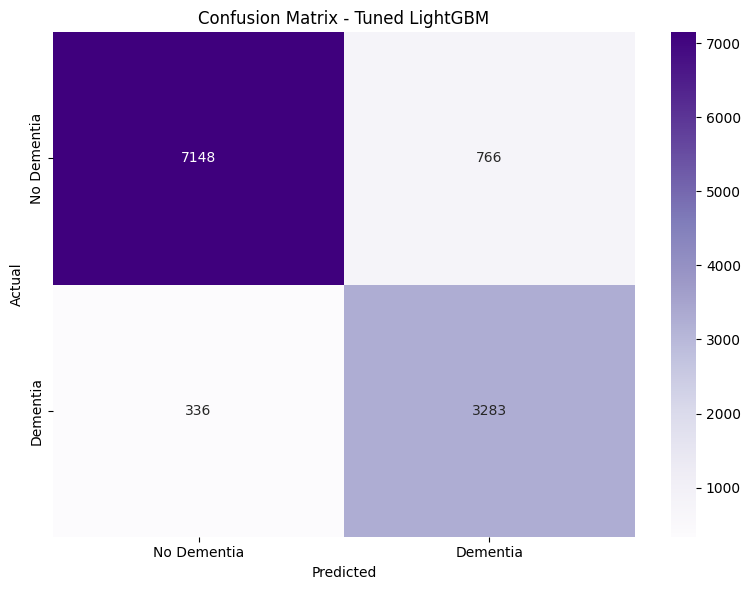

In [21]:
# Confusion Matrix for Tuned Model
cm_lgb_tuned = confusion_matrix(y_test, y_pred_lgb_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb_tuned, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['No Dementia', 'Dementia'],
            yticklabels=['No Dementia', 'Dementia'])
plt.title('Confusion Matrix - Tuned LightGBM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Feature Importance Analysis - LightGBM 


FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features:
     Feature  Importance
22   NACCADC        1284
6    BIRTHYR         789
14   INBIRYR         522
24  NACCDAYS         508
45     TAXES         322
47    TRAVEL         310
8       EDUC         293
42   SMOKYRS         288
9     EVENTS         287
13   INBIRMO         280
30  NACCNVST         270
10     GAMES         269
4      BILLS         257
17  INDEPEND         254
35  PTSDDXIF         247
41  SHOPPING         235
5    BIRTHMO         228
32   PAYATTN         207
26  NACCNOVS         201
21  MEALPREP         195


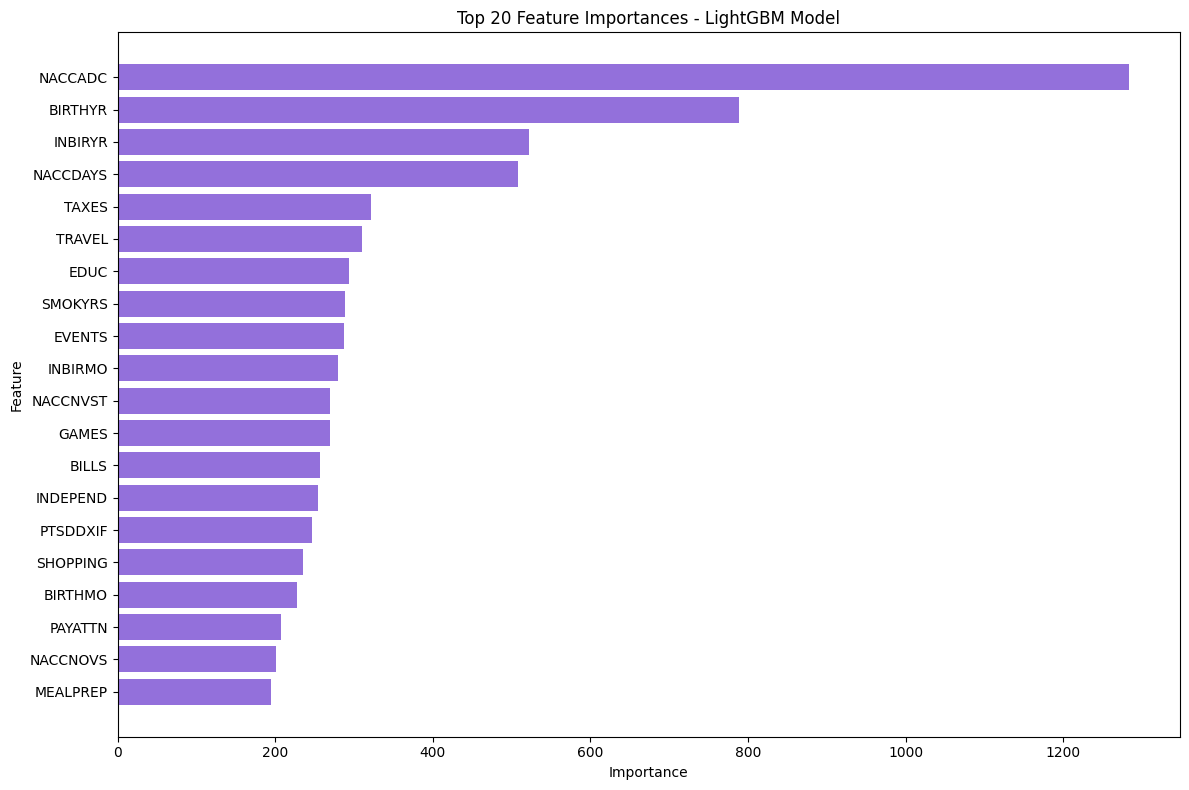


Feature importance saved to 'feature_importance_lightgbm.csv'


In [22]:
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importance from the tuned model
feature_importance_lgb = best_lgb.feature_importances_

# Create a DataFrame
feature_importance_lgb_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_lgb
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance_lgb_df.head(20))

# Visualize top 20 features
plt.figure(figsize=(12, 8))
top_features_lgb = feature_importance_lgb_df.head(20)
plt.barh(top_features_lgb['Feature'], top_features_lgb['Importance'], 
         color='mediumpurple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances - LightGBM Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save feature importance to CSV
feature_importance_lgb_df.to_csv('feature_importance_lightgbm.csv', index=False)
print("\nFeature importance saved to 'feature_importance_lightgbm.csv'")

Cross-Validation Performance - LightGBM 


CROSS-VALIDATION PERFORMANCE

Cross-Validation ROC-AUC Scores: [0.96923228 0.96574051 0.97064689 0.96826587 0.97091675]
Mean CV ROC-AUC: 0.9690
Std CV ROC-AUC: 0.0019


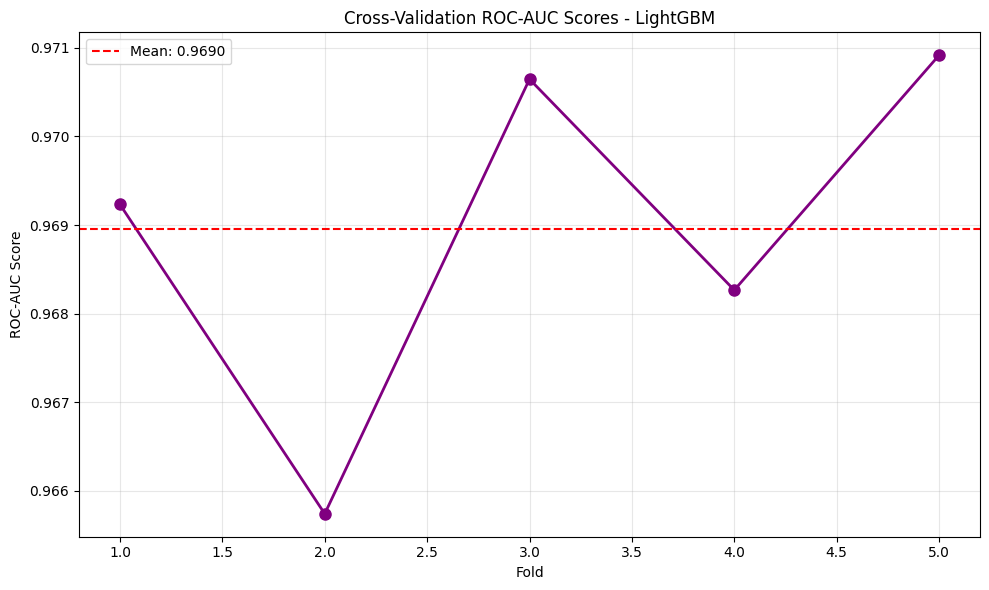

In [23]:
from sklearn.model_selection import cross_val_score

print("\n" + "="*60)
print("CROSS-VALIDATION PERFORMANCE")
print("="*60)

# Perform cross-validation on the best model
cv_scores_lgb = cross_val_score(
    best_lgb, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)

print(f"\nCross-Validation ROC-AUC Scores: {cv_scores_lgb}")
print(f"Mean CV ROC-AUC: {cv_scores_lgb.mean():.4f}")
print(f"Std CV ROC-AUC: {cv_scores_lgb.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_lgb, marker='o', linestyle='-', 
         color='purple', linewidth=2, markersize=8)
plt.axhline(y=cv_scores_lgb.mean(), color='red', linestyle='--', 
            label=f'Mean: {cv_scores_lgb.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('ROC-AUC Score')
plt.title('Cross-Validation ROC-AUC Scores - LightGBM')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

LightGBM Training History (Loss Curve)


TRAINING HISTORY - LOSS CURVE


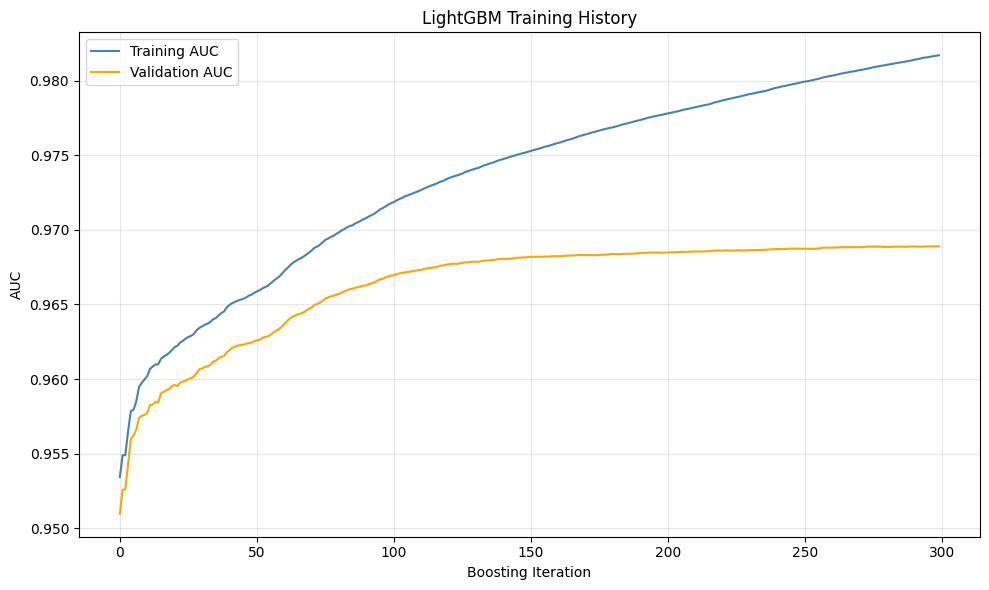


Best iteration: 299
Training stopped at iteration: 300


In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("TRAINING HISTORY - LOSS CURVE")
print("="*60)


params = best_lgb.get_params()
for key in ['random_state', 'early_stopping_round', 'verbose']:
    params.pop(key, None)          # avoid duplicate-argument errors


lgb_with_eval = lgb.LGBMClassifier(
    **params,
    random_state=42,               # keep the same seed (optional)
    early_stopping_rounds=50,      # same early-stopping you used in tuning
    verbose=-1                     # silence LightGBM logs
)


eval_set = [(X_train, y_train), (X_test, y_test)]

lgb_with_eval.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='auc',
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
)


results = lgb_with_eval.evals_result_


plt.figure(figsize=(10, 6))
plt.plot(results['training']['auc'], label='Training AUC',  color='steelblue')
plt.plot(results['valid_1']['auc'],   label='Validation AUC',color='orange')
plt.xlabel('Boosting Iteration')
plt.ylabel('AUC')
plt.title('LightGBM Training History')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


print(f"\nBest iteration: {lgb_with_eval.best_iteration_}")
print(f"Training stopped at iteration: {len(results['training']['auc'])}")


Learning Curves - LightGBM 


GENERATING LEARNING CURVES


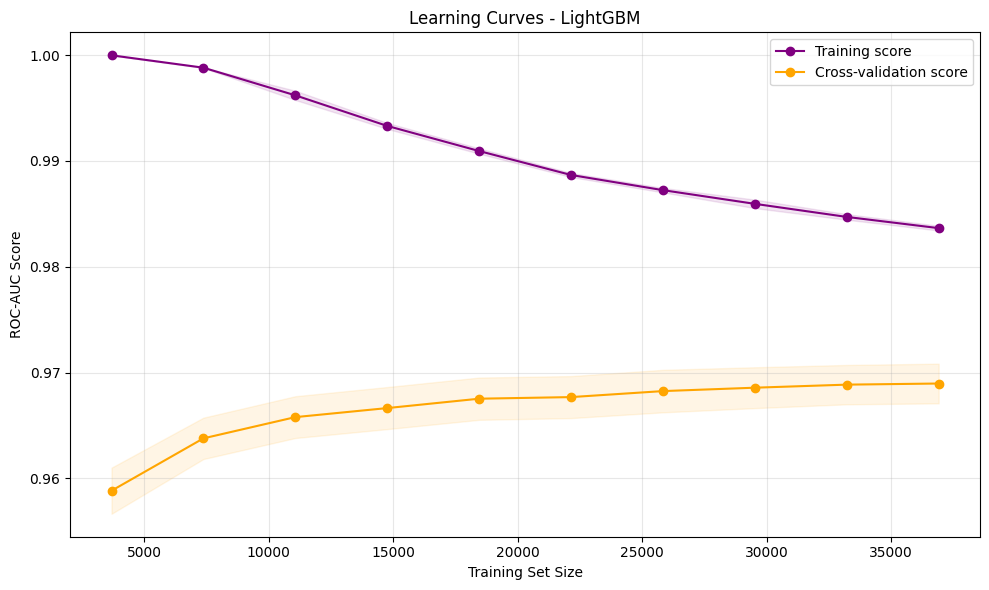

In [26]:
from sklearn.model_selection import learning_curve

print("\n" + "="*60)
print("GENERATING LEARNING CURVES")
print("="*60)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_lgb,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='purple')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_scores_mean, 'o-', color='purple', 
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', 
         label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.title('Learning Curves - LightGBM')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Save the LightGBM Model

In [27]:
import pickle

print("\n" + "="*60)
print("SAVING THE LIGHTGBM MODEL")
print("="*60)

# Save the best model
model_filename_lgb = 'lightgbm_dementia_model.pkl'
with open(model_filename_lgb, 'wb') as file:
    pickle.dump(best_lgb, file)

print(f"\nModel saved as '{model_filename_lgb}'")

# Also save as LightGBM native format (optional, more efficient)
best_lgb.booster_.save_model('lightgbm_dementia_model.txt')
print("Model also saved in LightGBM native format: 'lightgbm_dementia_model.txt'")

# Save model parameters
params_filename_lgb = 'lightgbm_best_params.txt'
with open(params_filename_lgb, 'w') as f:
    f.write("Best LightGBM Parameters:\n")
    f.write("="*50 + "\n")
    for param, value in grid_search_lgb.best_params_.items():
        f.write(f"{param}: {value}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Best CV ROC-AUC Score: {grid_search_lgb.best_score_:.4f}\n")

print(f"Best parameters saved to '{params_filename_lgb}'")

# Test loading the model
with open(model_filename_lgb, 'rb') as file:
    loaded_lgb_model = pickle.load(file)

# Verify loaded model works
test_prediction_lgb = loaded_lgb_model.predict(X_test[:5])
print(f"\nModel loaded successfully! Test prediction: {test_prediction_lgb}")


SAVING THE LIGHTGBM MODEL

Model saved as 'lightgbm_dementia_model.pkl'
Model also saved in LightGBM native format: 'lightgbm_dementia_model.txt'
Best parameters saved to 'lightgbm_best_params.txt'

Model loaded successfully! Test prediction: [1 0 0 1 0]


Generate Final LightGBM Report

In [28]:
print("\n" + "="*60)
print("LIGHTGBM MODEL - FINAL REPORT")
print("="*60)

final_report_lgb = f"""
LightGBM Dementia Prediction Model - Final Report
{'='*60}

Dataset Information:
- Total samples: {df.shape[0]}
- Total features: {X.shape[1]}
- Training samples: {X_train.shape[0]}
- Test samples: {X_test.shape[0]}

Best Hyperparameters:
{grid_search_lgb.best_params_}

Model Performance on Test Set:
- Accuracy: {accuracy_score(y_test, y_pred_lgb_tuned):.4f}
- Precision: {precision_score(y_test, y_pred_lgb_tuned):.4f}
- Recall: {recall_score(y_test, y_pred_lgb_tuned):.4f}
- F1-Score: {f1_score(y_test, y_pred_lgb_tuned):.4f}
- ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lgb_tuned):.4f}

Cross-Validation Performance:
- Mean CV ROC-AUC: {cv_scores_lgb.mean():.4f} (+/- {cv_scores_lgb.std():.4f})

Training Information:
- Best iteration: {lgb_with_eval.best_iteration_}
- Total iterations: {len(results['training']['auc'])}

Top 5 Most Important Features:
{feature_importance_lgb_df.head(5).to_string(index=False)}

Model saved as: {model_filename_lgb}
"""

print(final_report_lgb)

# Save report to file
with open('lightgbm_model_report.txt', 'w') as f:
    f.write(final_report_lgb)

print("\nReport saved to 'lightgbm_model_report.txt'")
print("\n" + "="*60)
print("LIGHTGBM MODEL TRAINING COMPLETE!")
print("="*60)


LIGHTGBM MODEL - FINAL REPORT

LightGBM Dementia Prediction Model - Final Report

Dataset Information:
- Total samples: 57663
- Total features: 48
- Training samples: 46130
- Test samples: 11533

Best Hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 300, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8}

Model Performance on Test Set:
- Accuracy: 0.9044
- Precision: 0.8108
- Recall: 0.9072
- F1-Score: 0.8563
- ROC-AUC: 0.9689

Cross-Validation Performance:
- Mean CV ROC-AUC: 0.9690 (+/- 0.0019)

Training Information:
- Best iteration: 299
- Total iterations: 300

Top 5 Most Important Features:
 Feature  Importance
 NACCADC        1284
 BIRTHYR         789
 INBIRYR         522
NACCDAYS         508
   TAXES         322

Model saved as: lightgbm_dementia_model.pkl


Report saved to 'lightgbm_model_report.txt'

LIGHTGBM MODEL TRAINING COMPLETE!


Comprehensive Model Comparison

In [ ]:
print("="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)


# XGBoost
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Random Forest
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# LightGBM
y_pred_lgb = best_lgb.predict(X_test)
y_pred_proba_lgb = best_lgb.predict_proba(X_test)[:, 1]

print("\nPredictions collected from all models!")

COMPREHENSIVE MODEL COMPARISON

Predictions collected from all models!


Performance Metrics Comparison Table

In [55]:
print("\n" + "="*60)
print("PERFORMANCE METRICS COMPARISON")
print("="*60)

# Create comprehensive comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'LightGBM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_lgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_lgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_lgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_lgb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_lgb)
    ]
})

print("\n" + comparison_df.to_string(index=False))

# Find best model for each metric
print("\n" + "="*60)
print("BEST MODEL PER METRIC")
print("="*60)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_value = comparison_df.loc[best_idx, metric]
    print(f"{metric:12s}: {best_model:15s} ({best_value:.4f})")

# Save comparison table
comparison_df.to_csv('model_comparison.csv', index=False)
print("\nComparison table saved to 'model_comparison.csv'")


PERFORMANCE METRICS COMPARISON

        Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      XGBoost  0.904535   0.813496 0.902736  0.855796 0.968687
Random Forest  0.903928   0.841819 0.854380  0.848053 0.963518
     LightGBM  0.904448   0.810817 0.907157  0.856286 0.968889

BEST MODEL PER METRIC
Accuracy    : XGBoost         (0.9045)
Precision   : Random Forest   (0.8418)
Recall      : LightGBM        (0.9072)
F1-Score    : LightGBM        (0.8563)
ROC-AUC     : LightGBM        (0.9689)

Comparison table saved to 'model_comparison.csv'


Build Voting Ensemble (Soft Voting)

In [ ]:
print("\n" + "="*80)
print("ENSEMBLE MODEL 1: VOTING CLASSIFIER (SOFT VOTING)")
print("="*80)

from sklearn.ensemble import VotingClassifier

# Create Voting Ensemble with soft voting
voting_ensemble = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('lgb', best_lgb)
    ],
    voting='soft',  # Use probability averaging
    weights=[1, 1, 1],  # Equal weights initially
    n_jobs=-1
)

print("\nTraining Voting Ensemble...")
voting_ensemble.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred_voting = voting_ensemble.predict(X_test)
y_pred_proba_voting = voting_ensemble.predict_proba(X_test)[:, 1]

# Evaluate
print("\n" + "="*60)
print("VOTING ENSEMBLE PERFORMANCE")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting, 
                          target_names=['No Dementia', 'Dementia']))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_voting):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_voting):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_voting):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_voting):.4f}")


ENSEMBLE MODEL 1: VOTING CLASSIFIER (SOFT VOTING)

Training Voting Ensemble...
Training completed!

VOTING ENSEMBLE PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

 No Dementia       0.95      0.91      0.93      7914
    Dementia       0.82      0.90      0.86      3619

    accuracy                           0.91     11533
   macro avg       0.89      0.90      0.89     11533
weighted avg       0.91      0.91      0.91     11533


Accuracy: 0.9070
Precision: 0.8224
Recall: 0.8972
F1-Score: 0.8582
ROC-AUC: 0.9681


Build Weighted Voting Ensemble

In [57]:
print("\n" + "="*80)
print("ENSEMBLE MODEL 2: WEIGHTED VOTING CLASSIFIER")
print("="*80)

# Use ROC-AUC scores as weights
weights = [
    roc_auc_score(y_test, y_pred_proba_xgb),
    roc_auc_score(y_test, y_pred_proba_rf),
    roc_auc_score(y_test, y_pred_proba_lgb)
]

print(f"\nWeights based on ROC-AUC:")
print(f"XGBoost: {weights[0]:.4f}")
print(f"Random Forest: {weights[1]:.4f}")
print(f"LightGBM: {weights[2]:.4f}")

# Create Weighted Voting Ensemble
weighted_voting_ensemble = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('lgb', best_lgb)
    ],
    voting='soft',
    weights=weights,  # Use performance-based weights
    n_jobs=-1
)

print("\nTraining Weighted Voting Ensemble...")
weighted_voting_ensemble.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred_weighted = weighted_voting_ensemble.predict(X_test)
y_pred_proba_weighted = weighted_voting_ensemble.predict_proba(X_test)[:, 1]

# Evaluate
print("\n" + "="*60)
print("WEIGHTED VOTING ENSEMBLE PERFORMANCE")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted, 
                          target_names=['No Dementia', 'Dementia']))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_weighted):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_weighted):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_weighted):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_weighted):.4f}")


ENSEMBLE MODEL 2: WEIGHTED VOTING CLASSIFIER

Weights based on ROC-AUC:
XGBoost: 0.9687
Random Forest: 0.9635
LightGBM: 0.9689

Training Weighted Voting Ensemble...
Training completed!

WEIGHTED VOTING ENSEMBLE PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

 No Dementia       0.95      0.91      0.93      7914
    Dementia       0.82      0.90      0.86      3619

    accuracy                           0.91     11533
   macro avg       0.89      0.90      0.89     11533
weighted avg       0.91      0.91      0.91     11533


Accuracy: 0.9070
Precision: 0.8224
Recall: 0.8972
F1-Score: 0.8582
ROC-AUC: 0.9681


Build Stacking Ensemble

In [ ]:
print("\n" + "="*80)
print("ENSEMBLE MODEL 3: STACKING CLASSIFIER")
print("="*80)

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


# Base models: XGBoost, Random Forest, LightGBM
# Meta-model: Logistic Regression

stacking_ensemble = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', best_rf),
        ('lgb', best_lgb)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,  # Cross-validation for meta-features
    n_jobs=-1
)

print("\nTraining Stacking Ensemble...")
print("(This may take a few minutes...)")
stacking_ensemble.fit(X_train, y_train)
print("Training completed!")

# Make predictions
y_pred_stacking = stacking_ensemble.predict(X_test)
y_pred_proba_stacking = stacking_ensemble.predict_proba(X_test)[:, 1]

# Evaluate
print("\n" + "="*60)
print("STACKING ENSEMBLE PERFORMANCE")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stacking, 
                          target_names=['No Dementia', 'Dementia']))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_stacking):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_stacking):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_stacking):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_stacking):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_stacking):.4f}")


ENSEMBLE MODEL 3: STACKING CLASSIFIER

Training Stacking Ensemble...
(This may take a few minutes...)
Training completed!

STACKING ENSEMBLE PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

 No Dementia       0.94      0.93      0.93      7914
    Dementia       0.85      0.87      0.86      3619

    accuracy                           0.91     11533
   macro avg       0.89      0.90      0.90     11533
weighted avg       0.91      0.91      0.91     11533


Accuracy: 0.9103
Precision: 0.8499
Recall: 0.8671
F1-Score: 0.8584
ROC-AUC: 0.9683


Final Model Comparison (Including Ensembles)

In [ ]:
print("\n" + "="*80)
print("FINAL COMPREHENSIVE MODEL COMPARISON")
print("="*80)

# final comparison including all models and ensembles
final_comparison = pd.DataFrame({
    'Model': [
        'XGBoost',
        'Random Forest',
        'LightGBM',
        'Voting Ensemble',
        'Weighted Voting',
        'Stacking Ensemble'
    ],

    'Accuracy': [
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_lgb),
        accuracy_score(y_test, y_pred_voting),
        accuracy_score(y_test, y_pred_weighted),
        accuracy_score(y_test, y_pred_stacking)
    ],
    'Precision': [
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_lgb),
        precision_score(y_test, y_pred_voting),
        precision_score(y_test, y_pred_weighted),
        precision_score(y_test, y_pred_stacking)
    ],
    'Recall': [
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_lgb),
        recall_score(y_test, y_pred_voting),
        recall_score(y_test, y_pred_weighted),
        recall_score(y_test, y_pred_stacking)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_lgb),
        f1_score(y_test, y_pred_voting),
        f1_score(y_test, y_pred_weighted),
        f1_score(y_test, y_pred_stacking)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_lgb),
        roc_auc_score(y_test, y_pred_proba_voting),
        roc_auc_score(y_test, y_pred_proba_weighted),
        roc_auc_score(y_test, y_pred_proba_stacking)
    ]
})

print("\n" + final_comparison.to_string(index=False))

# Highlight best scores
print("\n" + "="*60)
print("BEST MODEL PER METRIC")
print("="*60)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    best_idx = final_comparison[metric].idxmax()
    best_model = final_comparison.loc[best_idx, 'Model']
    best_value = final_comparison.loc[best_idx, metric]
    print(f"{metric:12s}: {best_model:20s} ({best_value:.4f})")

# Save final comparison
final_comparison.to_csv('final_model_comparison.csv', index=False)
print("\nFinal comparison saved to 'final_model_comparison.csv'")


FINAL COMPREHENSIVE MODEL COMPARISON

            Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
          XGBoost  0.904535   0.813496 0.902736  0.855796 0.968687
    Random Forest  0.903928   0.841819 0.854380  0.848053 0.963518
         LightGBM  0.904448   0.810817 0.907157  0.856286 0.968889
  Voting Ensemble  0.906963   0.822442 0.897209  0.858200 0.968108
  Weighted Voting  0.906963   0.822442 0.897209  0.858200 0.968111
Stacking Ensemble  0.910258   0.849946 0.867090  0.858432 0.968255

BEST MODEL PER METRIC
Accuracy    : Stacking Ensemble    (0.9103)
Precision   : Stacking Ensemble    (0.8499)
Recall      : LightGBM             (0.9072)
F1-Score    : Stacking Ensemble    (0.8584)
ROC-AUC     : LightGBM             (0.9689)

Final comparison saved to 'final_model_comparison.csv'


Visual Comparison with Ensembles


FINAL VISUAL COMPARISON


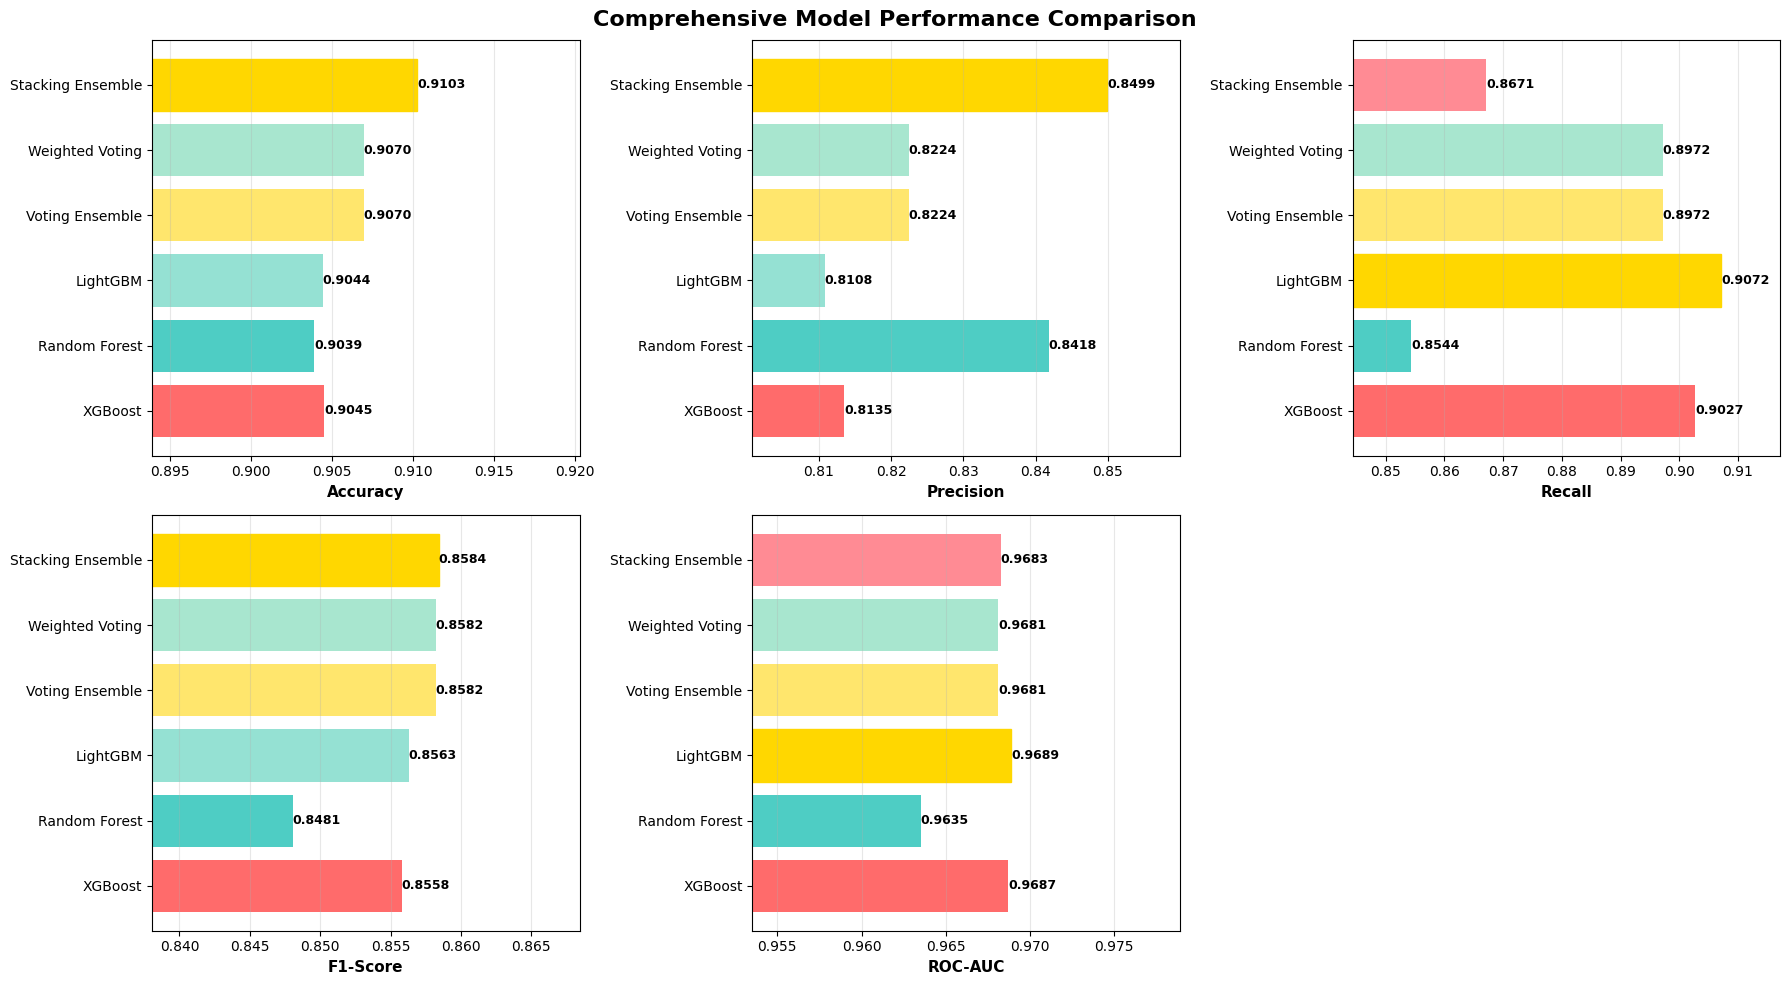

Final comparison chart saved as 'final_model_comparison_chart.png'


In [ ]:
print("\n" + "="*60)
print("FINAL VISUAL COMPARISON")
print("="*60)

# comprehensive bar chart
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comprehensive Model Performance Comparison', 
             fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#FFE66D', '#A8E6CF', '#FF8B94', '#C7CEEA']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    values = final_comparison[metric].values
    bars = ax.barh(final_comparison['Model'], values, color=colors)
    
    ax.set_xlabel(metric, fontsize=11, fontweight='bold')
    ax.set_xlim([min(values) - 0.01, max(values) + 0.01])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, values)):
        ax.text(value, bar.get_y() + bar.get_height()/2, 
                f'{value:.4f}',
                ha='left', va='center', fontsize=9, fontweight='bold')
    
    # Highlight best
    best_idx = final_comparison[metric].idxmax()
    bars[best_idx].set_color('#FFD700')  # Gold color for best

# Remove empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('final_model_comparison_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("Final comparison chart saved as 'final_model_comparison_chart.png'")

ROC Curves with Ensembles


ROC CURVES - ALL MODELS INCLUDING ENSEMBLES


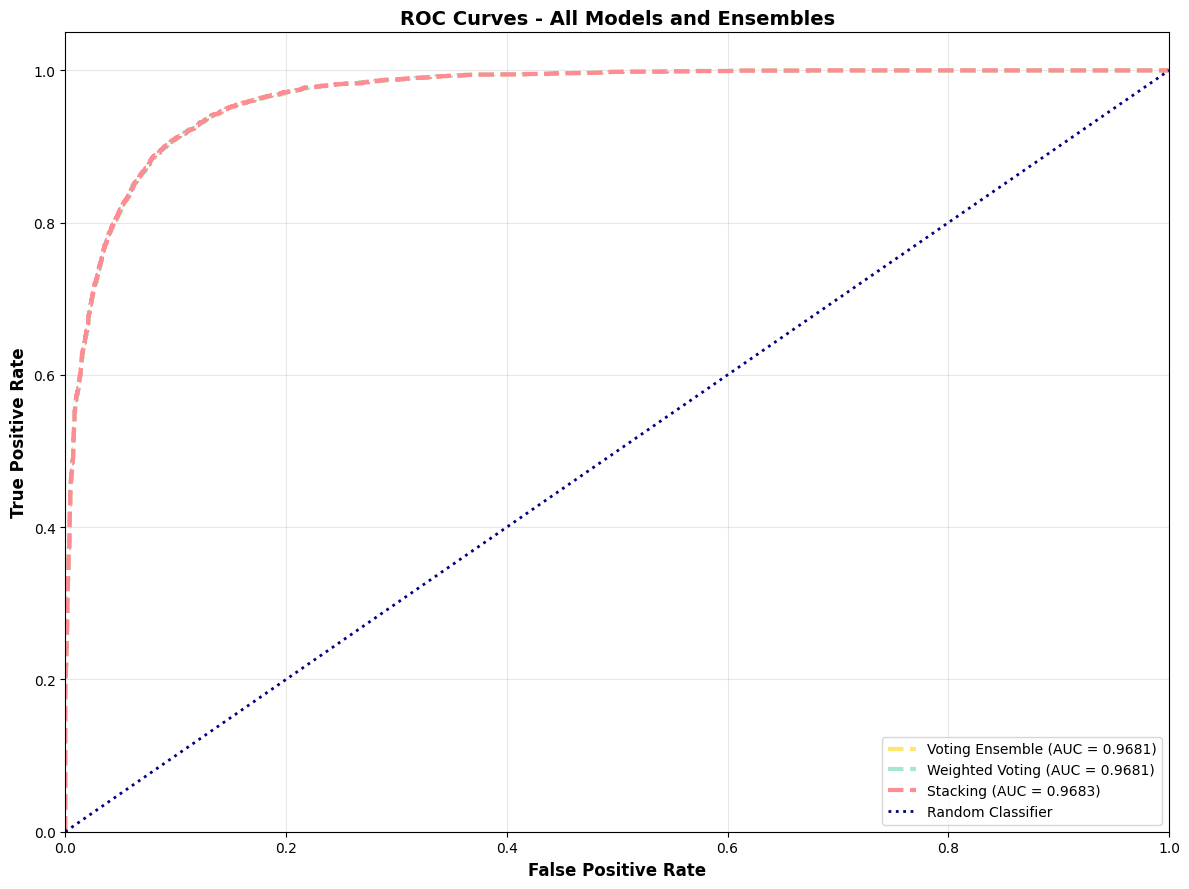

Final ROC curves saved as 'final_roc_curves_all_models.png'


In [66]:
print("\n" + "="*60)
print("ROC CURVES - ALL MODELS INCLUDING ENSEMBLES")
print("="*60)

# Calculate ROC curves for ensembles
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_proba_voting)
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_pred_proba_weighted)
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_pred_proba_stacking)


# Plot all ROC curves
plt.figure(figsize=(12, 9))


# Ensemble models
plt.plot(fpr_voting, tpr_voting, lw=3, 
         label=f'Voting Ensemble (AUC = {roc_auc_score(y_test, y_pred_proba_voting):.4f})', 
         color='#FFE66D', linestyle='--')
plt.plot(fpr_weighted, tpr_weighted, lw=3, 
         label=f'Weighted Voting (AUC = {roc_auc_score(y_test, y_pred_proba_weighted):.4f})', 
         color='#A8E6CF', linestyle='--')
plt.plot(fpr_stacking, tpr_stacking, lw=3, 
         label=f'Stacking (AUC = {roc_auc_score(y_test, y_pred_proba_stacking):.4f})', 
         color='#FF8B94', linestyle='--')

# Random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':', 
         label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models and Ensembles', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('final_roc_curves_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

print("Final ROC curves saved as 'final_roc_curves_all_models.png'")

Save Best Ensemble Model

In [67]:
print("\n" + "="*80)
print("SAVING BEST ENSEMBLE MODEL")
print("="*80)

import pickle

# Determine the best ensemble based on ROC-AUC
ensemble_scores = {
    'Voting Ensemble': roc_auc_score(y_test, y_pred_proba_voting),
    'Weighted Voting': roc_auc_score(y_test, y_pred_proba_weighted),
    'Stacking Ensemble': roc_auc_score(y_test, y_pred_proba_stacking)
}

best_ensemble_name = max(ensemble_scores, key=ensemble_scores.get)
best_ensemble_score = ensemble_scores[best_ensemble_name]

print(f"\nBest Ensemble Model: {best_ensemble_name}")
print(f"ROC-AUC Score: {best_ensemble_score:.4f}")

# Save the best ensemble
if best_ensemble_name == 'Voting Ensemble':
    best_ensemble_model = voting_ensemble
elif best_ensemble_name == 'Weighted Voting':
    best_ensemble_model = weighted_voting_ensemble
elif best_ensemble_name == 'Stacking Ensemble':
    best_ensemble_model = stacking_ensemble


# Also save all ensemble models
print("\nSaving all ensemble models...")
with open('voting_ensemble.pkl', 'wb') as file:
    pickle.dump(voting_ensemble, file)
with open('weighted_voting_ensemble.pkl', 'wb') as file:
    pickle.dump(weighted_voting_ensemble, file)
with open('stacking_ensemble.pkl', 'wb') as file:
    pickle.dump(stacking_ensemble, file)

print("All ensemble models saved!")


SAVING BEST ENSEMBLE MODEL

Best Ensemble Model: Stacking Ensemble
ROC-AUC Score: 0.9683

Saving all ensemble models...
All ensemble models saved!


Model Agreement Analysis


MODEL AGREEMENT ANALYSIS

Model Agreement Statistics:
All 3 models agree: 10973 samples (95.14%)
2 models agree: 560 samples (4.86%)
No models agree: 0 samples (0.00%)

Accuracy when all models agree: 0.9241
(This shows the confidence level when models unanimously agree)


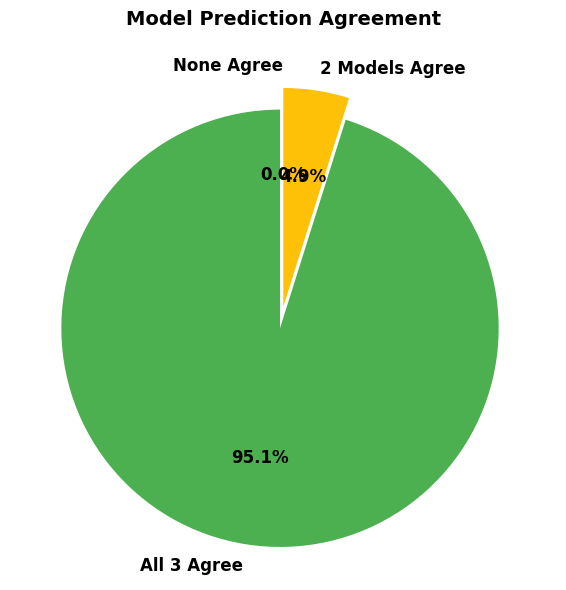


Model agreement chart saved as 'model_agreement.png'


In [ ]:
print("\n" + "="*80)
print("MODEL AGREEMENT ANALYSIS")
print("="*80)

# dataframe with all predictions
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'XGBoost': y_pred_xgb,
    'RandomForest': y_pred_rf,
    'LightGBM': y_pred_lgb,
    'Voting': y_pred_voting,
    'Weighted': y_pred_weighted,
    'Stacking': y_pred_stacking
})

# Calculate agreement between base models
predictions_df['All_Agree'] = (
    (predictions_df['XGBoost'] == predictions_df['RandomForest']) & 
    (predictions_df['RandomForest'] == predictions_df['LightGBM'])
).astype(int)

predictions_df['Two_Agree'] = (
    ((predictions_df['XGBoost'] == predictions_df['RandomForest']) & 
     (predictions_df['XGBoost'] != predictions_df['LightGBM'])) |
    ((predictions_df['XGBoost'] == predictions_df['LightGBM']) & 
     (predictions_df['XGBoost'] != predictions_df['RandomForest'])) |
    ((predictions_df['RandomForest'] == predictions_df['LightGBM']) & 
     (predictions_df['RandomForest'] != predictions_df['XGBoost']))
).astype(int)

predictions_df['None_Agree'] = (
    (predictions_df['All_Agree'] == 0) & 
    (predictions_df['Two_Agree'] == 0)
).astype(int)

# Print agreement statistics
print("\nModel Agreement Statistics:")
print(f"All 3 models agree: {predictions_df['All_Agree'].sum()} samples ({predictions_df['All_Agree'].mean()*100:.2f}%)")
print(f"2 models agree: {predictions_df['Two_Agree'].sum()} samples ({predictions_df['Two_Agree'].mean()*100:.2f}%)")
print(f"No models agree: {predictions_df['None_Agree'].sum()} samples ({predictions_df['None_Agree'].mean()*100:.2f}%)")

# Accuracy when all models agree
all_agree_mask = predictions_df['All_Agree'] == 1
if all_agree_mask.sum() > 0:
    all_agree_accuracy = (predictions_df.loc[all_agree_mask, 'Actual'] == 
                          predictions_df.loc[all_agree_mask, 'XGBoost']).mean()
    print(f"\nAccuracy when all models agree: {all_agree_accuracy:.4f}")
    print("(This shows the confidence level when models unanimously agree)")

# Visualize agreement
agreement_data = [
    predictions_df['All_Agree'].sum(),
    predictions_df['Two_Agree'].sum(),
    predictions_df['None_Agree'].sum()
]

plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#FFC107', '#F44336']
explode = (0.1, 0, 0)
plt.pie(agreement_data, 
        labels=['All 3 Agree', '2 Models Agree', 'None Agree'],
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Model Prediction Agreement', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('model_agreement.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nModel agreement chart saved as 'model_agreement.png'")

Confidence Analysis


PREDICTION CONFIDENCE ANALYSIS

Average Prediction Confidence (distance from 0.5):
          Model  Avg_Confidence
        XGBoost        0.411915
  Random Forest        0.387033
       LightGBM        0.411243
Voting Ensemble        0.401276

Higher confidence = More certain predictions


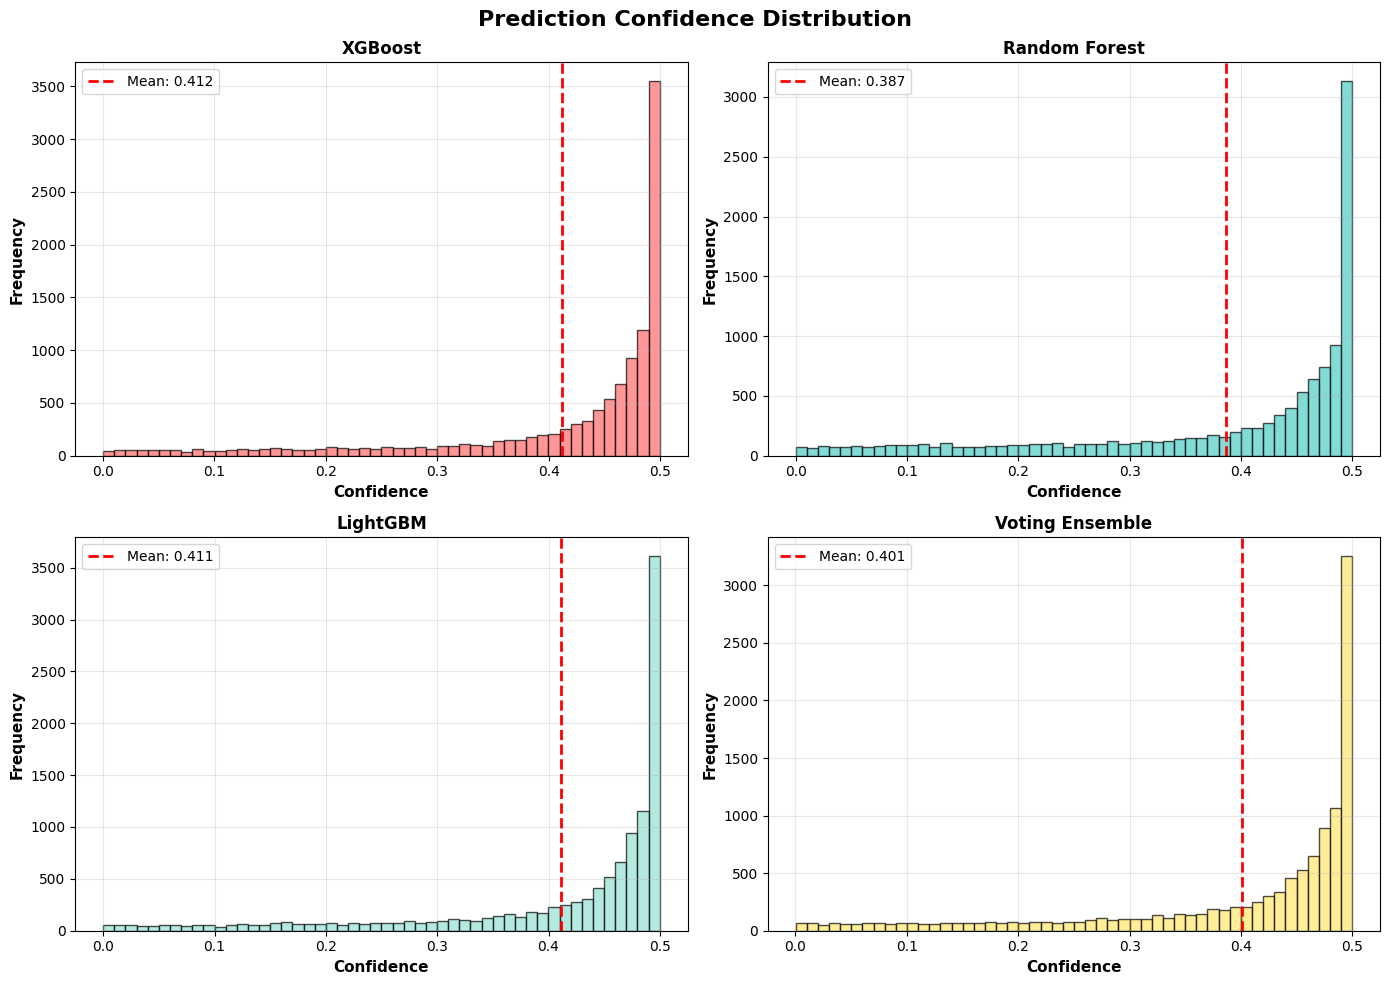


Confidence distribution saved as 'prediction_confidence_distribution.png'


In [69]:
print("\n" + "="*80)
print("PREDICTION CONFIDENCE ANALYSIS")
print("="*80)

# Calculate prediction confidence (distance from 0.5 threshold)
confidence_xgb = np.abs(y_pred_proba_xgb - 0.5)
confidence_rf = np.abs(y_pred_proba_rf - 0.5)
confidence_lgb = np.abs(y_pred_proba_lgb - 0.5)
confidence_voting = np.abs(y_pred_proba_voting - 0.5)

# Average confidence
avg_confidence = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'LightGBM', 'Voting Ensemble'],
    'Avg_Confidence': [
        confidence_xgb.mean(),
        confidence_rf.mean(),
        confidence_lgb.mean(),
        confidence_voting.mean()
    ]
})

print("\nAverage Prediction Confidence (distance from 0.5):")
print(avg_confidence.to_string(index=False))
print("\nHigher confidence = More certain predictions")

# Visualize confidence distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Prediction Confidence Distribution', fontsize=16, fontweight='bold')

models = ['XGBoost', 'Random Forest', 'LightGBM', 'Voting Ensemble']
confidences = [confidence_xgb, confidence_rf, confidence_lgb, confidence_voting]
colors_conf = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#FFE66D']

for idx, (model, conf, color) in enumerate(zip(models, confidences, colors_conf)):
    ax = axes[idx // 2, idx % 2]
    ax.hist(conf, bins=50, color=color, alpha=0.7, edgecolor='black')
    ax.axvline(conf.mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {conf.mean():.3f}')
    ax.set_xlabel('Confidence', fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(model, fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('prediction_confidence_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nConfidence distribution saved as 'prediction_confidence_distribution.png'")

Error Analysis

In [70]:
print("\n" + "="*80)
print("ERROR ANALYSIS - WHERE MODELS FAIL")
print("="*80)

# Find samples where all models are wrong
all_wrong_mask = (
    (predictions_df['XGBoost'] != predictions_df['Actual']) &
    (predictions_df['RandomForest'] != predictions_df['Actual']) &
    (predictions_df['LightGBM'] != predictions_df['Actual'])
)

print(f"\nSamples where all 3 models are wrong: {all_wrong_mask.sum()} ({all_wrong_mask.mean()*100:.2f}%)")

# Find samples where all models are correct
all_correct_mask = (
    (predictions_df['XGBoost'] == predictions_df['Actual']) &
    (predictions_df['RandomForest'] == predictions_df['Actual']) &
    (predictions_df['LightGBM'] == predictions_df['Actual'])
)

print(f"Samples where all 3 models are correct: {all_correct_mask.sum()} ({all_correct_mask.mean()*100:.2f}%)")

# Analyze difficult cases (where models disagree)
difficult_cases = predictions_df[predictions_df['None_Agree'] == 1].copy()
if len(difficult_cases) > 0:
    print(f"\nDifficult cases (no agreement): {len(difficult_cases)} samples")
    print("These are the hardest samples to classify")
    
    # Get indices for further analysis
    difficult_indices = difficult_cases.index.tolist()
    print(f"\nFirst 10 difficult case indices: {difficult_indices[:10]}")

# Error breakdown by class
print("\n" + "="*60)
print("ERROR BREAKDOWN BY CLASS")
print("="*60)

for model_name in ['XGBoost', 'RandomForest', 'LightGBM']:
    print(f"\n{model_name}:")
    
    # False Positives (predicted 1, actual 0)
    fp_mask = (predictions_df[model_name] == 1) & (predictions_df['Actual'] == 0)
    print(f"  False Positives: {fp_mask.sum()}")
    
    # False Negatives (predicted 0, actual 1)
    fn_mask = (predictions_df[model_name] == 0) & (predictions_df['Actual'] == 1)
    print(f"  False Negatives: {fn_mask.sum()}")


ERROR ANALYSIS - WHERE MODELS FAIL

Samples where all 3 models are wrong: 833 (7.22%)
Samples where all 3 models are correct: 10140 (87.92%)

ERROR BREAKDOWN BY CLASS

XGBoost:
  False Positives: 749
  False Negatives: 352

RandomForest:
  False Positives: 581
  False Negatives: 527

LightGBM:
  False Positives: 766
  False Negatives: 336


Cross-Model Correlation


CROSS-MODEL PREDICTION CORRELATION

Correlation between model predictions:
               XGBoost  RandomForest  LightGBM    Voting  Weighted  Stacking
XGBoost       1.000000      0.981250  0.996141  0.996628  0.996640  0.987890
RandomForest  0.981250      1.000000  0.979112  0.991231  0.991201  0.978708
LightGBM      0.996141      0.979112  1.000000  0.996747  0.996762  0.987802
Voting        0.996628      0.991231  0.996747  1.000000  1.000000  0.989990
Weighted      0.996640      0.991201  0.996762  1.000000  1.000000  0.989994
Stacking      0.987890      0.978708  0.987802  0.989990  0.989994  1.000000


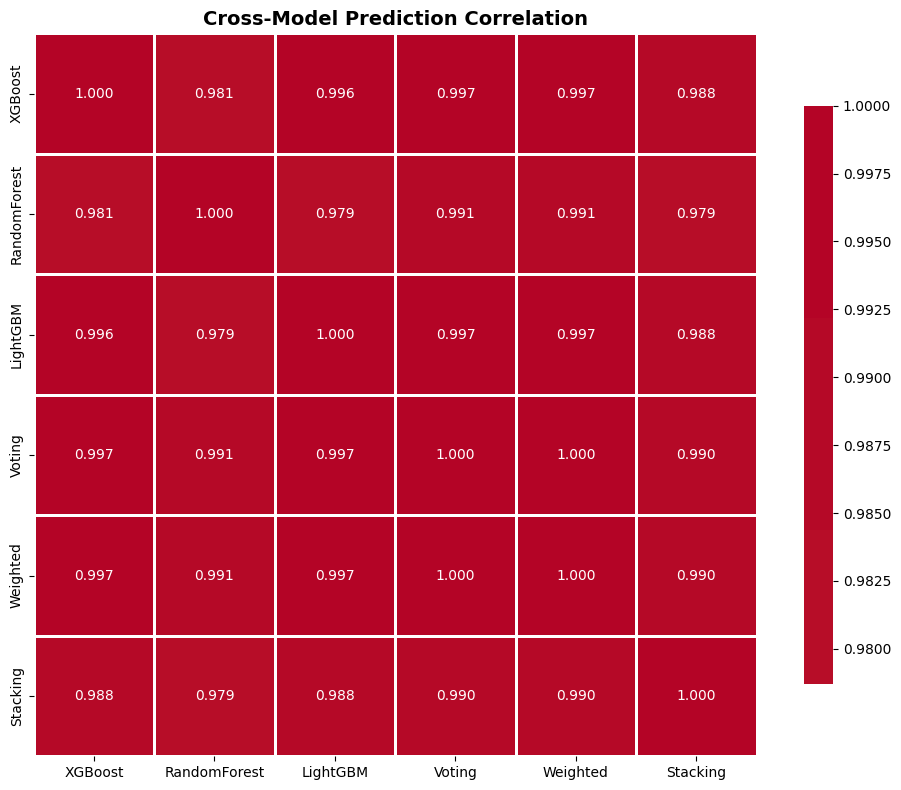


Correlation heatmap saved as 'model_correlation_heatmap.png'

High correlation = Models make similar predictions
Low correlation = Models capture different patterns (good for ensembles!)


In [72]:
print("\n" + "="*80)
print("CROSS-MODEL PREDICTION CORRELATION")
print("="*80)

# Calculate correlation between model predictions (probabilities)
prob_df = pd.DataFrame({
    'XGBoost': y_pred_proba_xgb,
    'RandomForest': y_pred_proba_rf,
    'LightGBM': y_pred_proba_lgb,
    'Voting': y_pred_proba_voting,
    'Weighted': y_pred_proba_weighted,
    'Stacking': y_pred_proba_stacking
})

# Calculate correlation matrix
correlation_matrix = prob_df.corr()

print("\nCorrelation between model predictions:")
print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Cross-Model Prediction Correlation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('model_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrelation heatmap saved as 'model_correlation_heatmap.png'")
print("\nHigh correlation = Models make similar predictions")
print("Low correlation = Models capture different patterns (good for ensembles!)")